# Pre-processing & Training Data Development

In [1]:
# load necessary Packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set()

In [2]:
# Read in .csv file
df = pd.read_csv(r'C:\Users\Jake Wojcik\Documents\Springboard\DS Career Track Course\Capstone_2\Data\df_EDA.csv',index_col=0)
df

Player_id  Draft_Year   Rnd   Pick   Tm           Player  \
0      2015Jameis Winston      2015.0   1.0    1.0  TAM   Jameis Winston   
1      2015Marcus Mariota      2015.0   1.0    2.0  TEN   Marcus Mariota   
2        2015Dante Fowler      2015.0   1.0    3.0  JAX     Dante Fowler   
3        2015Amari Cooper      2015.0   1.0    4.0  OAK     Amari Cooper   
4     2015Brandon Scherff      2015.0   1.0    5.0  WAS  Brandon Scherff   
...                   ...         ...   ...    ...  ...              ...   
5638  1987Tyrone Sorrells      1987.0  12.0  319.0  NOR  Tyrone Sorrells   
5639       1987Tony Burse      1987.0  12.0  324.0  SEA       Tony Burse   
5640     1987Bruce Holmes      1987.0  12.0  325.0  KAN     Bruce Holmes   
5641    1987Bill Ransdell      1987.0  12.0  327.0  NYJ    Bill Ransdell   
5642   1987John Holifield      1987.0  12.0  328.0  CIN   John Holifield   

     Position Standard  First4AV   Age      To  AP1   PB   St  CarAV  DrAV  \
0                   QB      13.0  21.0  2016.0  0.0  1.0  2.0   13.0  13.0   
1                   QB       9.0  21.0  2016.0  0.0  0.0  2.0    9.0   9.0   
2                   LB       0.0  21.0  2016.0  0.0  0.0  0.0    0.0   0.0   
3                   WR       9.0  21.0  2016.0  0.0  1.0  1.0    9.0   9.0   
4                    T       7.0  23.0  2016.0  0.0  0.0  2.0    7.0   7.0   
...                ...       ...   ...     ...  ...  ...  ...    ...   ...   
5638                 G       0.0  22.0  1987.0  0.0  0.0  0.0    NaN   NaN   
5639                RB       0.0  22.0  1987.0  0.0  0.0  0.0    0.0   0.0   
5640                LB       1.0  21.0  1993.0  0.0  0.0  0.0    1.0   1.0   
5641                QB       0.0  22.0  1987.0  0.0  0.0  0.0    NaN   NaN   
5642                RB       0.0  23.0  1989.0  0.0  0.0  0.0    0.0   0.0   

         G    Cmp  Pass_Att  Pass_Yds  Pass_TD  Pass_Int  Rush_Att  Rush_Yds  \
0     26.0  540.0     913.0    6722.0     42.0      25.0      86.0     311.0   
1     23.0  458.0     725.0    5590.0     42.0      18.0      79.0     516.0   
2     10.0    NaN       NaN       NaN      NaN       NaN       NaN       NaN   
3     26.0    NaN       NaN       NaN      NaN       NaN       3.0      -3.0   
4     27.0    NaN       NaN       NaN      NaN       NaN       NaN       NaN   
...    ...    ...       ...       ...      ...       ...       ...       ...   
5638   NaN    NaN       NaN       NaN      NaN       NaN       NaN       NaN   
5639  12.0    NaN       NaN       NaN      NaN       NaN       7.0      36.0   
5640   4.0    NaN       NaN       NaN      NaN       NaN       NaN       NaN   
5641   NaN    NaN       NaN       NaN      NaN       NaN       NaN       NaN   
5642   3.0    NaN       NaN       NaN      NaN       NaN      11.0      20.0   

      Rush_TDs    Rec  Rec_Yds  Rec_Tds   Tkl  Def_Int   Sk  \
0          7.0    NaN      NaN      NaN   NaN      NaN  NaN   
1          4.0    1.0     41.0      1.0   NaN      NaN  NaN   
2          NaN    NaN      NaN      NaN  16.0      NaN  2.5   
3          0.0  134.0   1970.0      9.0   NaN      NaN  NaN   
4          NaN    NaN      NaN      NaN   NaN      NaN  NaN   
...        ...    ...      ...      ...   ...      ...  ...   
5638       NaN    NaN      NaN      NaN   NaN      NaN  NaN   
5639       0.0    NaN      NaN      NaN   NaN      NaN  NaN   
5640       NaN    NaN      NaN      NaN   NaN      NaN  NaN   
5641       NaN    NaN      NaN      NaN   NaN      NaN  NaN   
5642       0.0    2.0     18.0      0.0   NaN      NaN  NaN   

                     College  Height (in)  Weight (lbs)  Hand Size (in)  \
0              Florida State        76.00         231.0        9.380000   
1                     Oregon        75.75         222.0        9.880000   
2                    Florida        74.63         261.0        9.500000   
3                    Alabama        72.88         211.0       10.000000   
4                       Iowa        76.63         319.0       11.000000  

### Create Features 

In [3]:
# Create number of seasons feature by substracting "To" column by "Draft_Year"
df['Seasons'] = df['To']-df['Draft_Year']+1
#drop 'To' column as its not needed anymore
df.drop('To', axis=1, inplace=True)


In [4]:
# Create average yards per attempt for passing, rushing, and recieving
df['pass_yards/attempt'] = df['Pass_Yds']/df['Pass_Att']
df['rush_yards/attempt'] = df['Rush_Yds']/df['Rush_Att']
df['rec_yards/rec'] = df['Rec_Yds']/df['Rec']

In [5]:
# Create completion percentage for Quarterbacks
df['completion_percentage'] = df['Cmp']/df['Pass_Att']


In [6]:
#Replace negative CarAV to zeros
df[df['CarAV']<0]=0 

It's necessary to create features on a per season basis to account for the number of seasons played. Players with more season played will have higher stats and higher approximate values. This will even out all players no matter the number of seasons played.  

In [7]:
# Create stats on a per season basis for all stats
def season_stats(s):
    df[s+'/season'] = df[s]/df['Seasons']
    
    
stats = ['Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD',
       'Pass_Int', 'Rush_Att', 'Rush_Yds', 'Rush_TDs', 'Rec', 'Rec_Yds',
       'Rec_Tds', 'Tkl', 'Def_Int', 'Sk','G','CarAV','AP1','PB']
for stat in stats:
    season_stats(stat)

### Fill Missing Values

The most reasonable way to fill the missing stats is to fill them with zeros because in reality, zero is likely the correct statistic for any given player. For example, a defensive tackle will never throw a pass attempt in his career, just as a quarterback will never record a sack.   

In [8]:
# Fill missing stats with zero
df.fillna(0,inplace=True)

In [9]:
# fix columns with infinity value
df.replace([np.inf, -np.inf], 0,inplace=True)


In [10]:
df

Player_id  Draft_Year   Rnd   Pick   Tm           Player  \
0      2015Jameis Winston      2015.0   1.0    1.0  TAM   Jameis Winston   
1      2015Marcus Mariota      2015.0   1.0    2.0  TEN   Marcus Mariota   
2        2015Dante Fowler      2015.0   1.0    3.0  JAX     Dante Fowler   
3        2015Amari Cooper      2015.0   1.0    4.0  OAK     Amari Cooper   
4     2015Brandon Scherff      2015.0   1.0    5.0  WAS  Brandon Scherff   
...                   ...         ...   ...    ...  ...              ...   
5638  1987Tyrone Sorrells      1987.0  12.0  319.0  NOR  Tyrone Sorrells   
5639       1987Tony Burse      1987.0  12.0  324.0  SEA       Tony Burse   
5640     1987Bruce Holmes      1987.0  12.0  325.0  KAN     Bruce Holmes   
5641    1987Bill Ransdell      1987.0  12.0  327.0  NYJ    Bill Ransdell   
5642   1987John Holifield      1987.0  12.0  328.0  CIN   John Holifield   

     Position Standard  First4AV   Age  AP1   PB   St  CarAV  DrAV     G  \
0                   QB      13.0  21.0  0.0  1.0  2.0   13.0  13.0  26.0   
1                   QB       9.0  21.0  0.0  0.0  2.0    9.0   9.0  23.0   
2                   LB       0.0  21.0  0.0  0.0  0.0    0.0   0.0  10.0   
3                   WR       9.0  21.0  0.0  1.0  1.0    9.0   9.0  26.0   
4                    T       7.0  23.0  0.0  0.0  2.0    7.0   7.0  27.0   
...                ...       ...   ...  ...  ...  ...    ...   ...   ...   
5638                 G       0.0  22.0  0.0  0.0  0.0    0.0   0.0   0.0   
5639                RB       0.0  22.0  0.0  0.0  0.0    0.0   0.0  12.0   
5640                LB       1.0  21.0  0.0  0.0  0.0    1.0   1.0   4.0   
5641                QB       0.0  22.0  0.0  0.0  0.0    0.0   0.0   0.0   
5642                RB       0.0  23.0  0.0  0.0  0.0    0.0   0.0   3.0   

        Cmp  Pass_Att  Pass_Yds  Pass_TD  Pass_Int  Rush_Att  Rush_Yds  \
0     540.0     913.0    6722.0     42.0      25.0      86.0     311.0   
1     458.0     725.0    5590.0     42.0      18.0      79.0     516.0   
2       0.0       0.0       0.0      0.0       0.0       0.0       0.0   
3       0.0       0.0       0.0      0.0       0.0       3.0      -3.0   
4       0.0       0.0       0.0      0.0       0.0       0.0       0.0   
...     ...       ...       ...      ...       ...       ...       ...   
5638    0.0       0.0       0.0      0.0       0.0       0.0       0.0   
5639    0.0       0.0       0.0      0.0       0.0       7.0      36.0   
5640    0.0       0.0       0.0      0.0       0.0       0.0       0.0   
5641    0.0       0.0       0.0      0.0       0.0       0.0       0.0   
5642    0.0       0.0       0.0      0.0       0.0      11.0      20.0   

      Rush_TDs    Rec  Rec_Yds  Rec_Tds   Tkl  Def_Int   Sk  \
0          7.0    0.0      0.0      0.0   0.0      0.0  0.0   
1          4.0    1.0     41.0      1.0   0.0      0.0  0.0   
2          0.0    0.0      0.0      0.0  16.0      0.0  2.5   
3          0.0  134.0   1970.0      9.0   0.0      0.0  0.0   
4          0.0    0.0      0.0      0.0   0.0      0.0  0.0   
...        ...    ...      ...      ...   ...      ...  ...   
5638       0.0    0.0      0.0      0.0   0.0      0.0  0.0   
5639       0.0    0.0      0.0      0.0   0.0      0.0  0.0   
5640       0.0    0.0      0.0      0.0   0.0      0.0  0.0   
5641       0.0    0.0      0.0      0.0   0.0      0.0  0.0   
5642       0.0    2.0     18.0      0.0   0.0      0.0  0.0   

                     College  Height (in)  Weight (lbs)  Hand Size (in)  \
0              Florida State        76.00         231.0        9.380000   
1                     Oregon        75.75         222.0        9.880000   
2                    Florida        74.63         261.0        9.500000   
3                    Alabama        72.88         211.0       10.000000   
4                       Iowa        76.63         319.0       11.000000   
...                      ...          ...           ...             ...   
5638            Geo

### Create Dummy Features for Categorical Data

We are going to drop all the categorical variables for training except "Position Standard". Position Standard will be created into dummy features. The team drafted doesn't add any predictive power to our model. We've reduced the "college" feature down to the "Power Five" feature and "Pos"/"40_dist" are already accounted for from other columns. We should also drop "First4AV" and "DrAV" since they are very similar to our response variable.

In [11]:
# Drop Unnecessary columns
df.drop(['Player_id', 'Tm', 'Player', 'College', '40_dist',
       'First4AV','DrAV'],axis=1,inplace=True)
#Create dummy variables for Position
df = pd.get_dummies(df, columns=['Position Standard'], drop_first=True,prefix='Pos')

### Split Data into Test & Train Subsamples

To prevent data leakage we want to split our data non-randomly. Instead, the training data will be all drafts from 1987 to 2010, and the test data will be the last three drafts, 2011 through 2015. The training and test data account for ~80% & ~20% respectively. Ultimately, we want our model to predict future results. By splitting the data in this way we can improve our models' accuracy on new data.  

In [126]:
Combine = ['Draft_Year','Height (in)','Rnd', 'Pick', 'Age', 'Weight (lbs)', 'Hand Size (in)',
       'Arm Length (in)', 'Wonderlic', '40 Yard', 'Bench Press',
       'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone', '60Yd Shuttle',
       'Power_five','Pos_C', 'Pos_DB', 'Pos_DE', 'Pos_DT',
       'Pos_FB', 'Pos_G', 'Pos_K', 'Pos_LB', 'Pos_LS', 'Pos_P', 'Pos_QB',
       'Pos_RB', 'Pos_T', 'Pos_TE', 'Pos_WR','Seasons','Pos','CarAV/season']
Stats = ['AP1', 'PB', 'St', 'CarAV', 'G',
       'Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD', 'Pass_Int', 'Rush_Att',
       'Rush_Yds', 'Rush_TDs', 'Rec', 'Rec_Yds', 'Rec_Tds', 'Tkl', 'Def_Int',
       'Sk','Seasons', 'pass_yards/attempt', 'rush_yards/attempt',
       'rec_yards/rec', 'completion_percentage', 'Cmp/season',
       'Pass_Att/season', 'Pass_Yds/season', 'Pass_TD/season',
       'Pass_Int/season', 'Rush_Att/season', 'Rush_Yds/season',
       'Rush_TDs/season', 'Rec/season', 'Rec_Yds/season', 'Rec_Tds/season',
       'Tkl/season', 'Def_Int/season', 'Sk/season','Pos_C', 'Pos_DB', 'Pos_DE', 'Pos_DT',
       'Pos_FB', 'Pos_G', 'Pos_K', 'Pos_LB', 'Pos_LS', 'Pos_P', 'Pos_QB',
       'Pos_RB', 'Pos_T', 'Pos_TE', 'Pos_WR','Seasons','Pos','CarAV/season','G/season','PB/season','AP1/season']
Position = ['Pos_C', 'Pos_DB', 'Pos_DE', 'Pos_DT',
       'Pos_FB', 'Pos_G', 'Pos_K', 'Pos_LB', 'Pos_LS', 'Pos_P', 'Pos_QB',
       'Pos_RB', 'Pos_T', 'Pos_TE', 'Pos_WR','Seasons','Pos']
career_stats = ['AP1', 'PB', 'St', 'CarAV', 'G',
       'Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD', 'Pass_Int', 'Rush_Att',
       'Rush_Yds', 'Rush_TDs', 'Rec', 'Rec_Yds', 'Rec_Tds', 'Tkl', 'Def_Int',
       'Sk','Seasons','Pos_C', 'Pos_DB', 'Pos_DE', 'Pos_DT',
       'Pos_FB', 'Pos_G', 'Pos_K', 'Pos_LB', 'Pos_LS', 'Pos_P', 'Pos_QB',
       'Pos_RB', 'Pos_T', 'Pos_TE', 'Pos_WR','Seasons','Pos','CarAV/season']


In [127]:
from sklearn.model_selection import train_test_split

# Position of players were dropped because they didn't improve or negatively impact the models 

X = df.drop(career_stats,axis=1)
y = df['CarAV/season']

#define training sets
X_train = df[df['Draft_Year']<=2010]
X_train = X_train.drop(career_stats,axis=1)
y_train = df[df['Draft_Year']<=2010]
y_train = y_train['CarAV/season'].values

#define test sets
X_test = df[df['Draft_Year']>=2011]
X_test = X_test.drop(career_stats,axis=1)
y_test = df[df['Draft_Year']>=2011]
y_test = y_test['CarAV/season'].values
#y_test = y_test.reshape(-1,1)
#y_train = y_train.reshape(1,-1)


In [128]:
X_test.shape

(1045, 38)

### Scale Data to Prep for Model Creation

In [129]:
#scale data
from sklearn import preprocessing
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [130]:
print(X_train_scaled.shape,X_test_scaled.shape,y_train.shape,y_test.shape)

(4598, 38) (1045, 38) (4598,) (1045,)


# Modeling: Predict NFL Success from Season Statisitics 

Before we start trying to predict NFL success from Combine stats, lets see if we can predict success from the plethora of stats in our dataset. This should be relatively straightforward since the approximate value feature is calculated partially from these stats. 

### Model 1: Simple Linear Regression 

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
print(f"Explained Variance: {metrics.explained_variance_score(y_test,y_pred)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred)}")
r2 = metrics.r2_score(y_test,y_pred)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print(f"Adjusted R2 Score: {adj_r2}")

Explained Variance: 0.7724018375672274
Mean Absolute Error: 0.8016763282245183
Mean Squared Error: 1.0521256594339077
Root Mean Squared Error: 1.0257317677804016
R2 Score: 0.7553822893543767
Adjusted R2 Score: 0.7533433612989844


#### Review model coefficeints to determine most important features

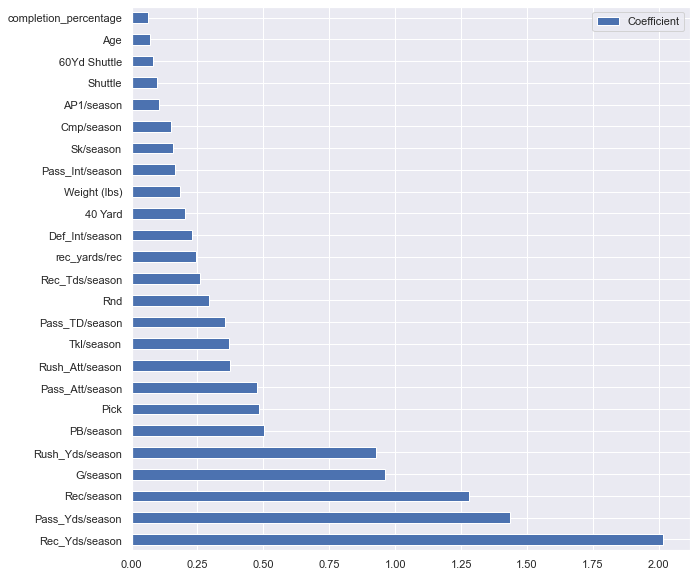

In [18]:
co_df = pd.DataFrame(abs(model.coef_), X_train.columns, columns=['Coefficient'])
co_df.sort_values(by=['Coefficient'], ascending=False,inplace=True)
co_df.head(25).plot(kind='barh',figsize=(10,10))
plt.show()

It's interesting to see reception yards are more important to the model than passing yards. It's also interesting to see games played so high on the list. We can see the most important Combine statistic is the 40 yard dash unsurprisingly. 

#### Visualize Model Performance

In [19]:
# Create dataframe of predicted vs. actual values
df_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

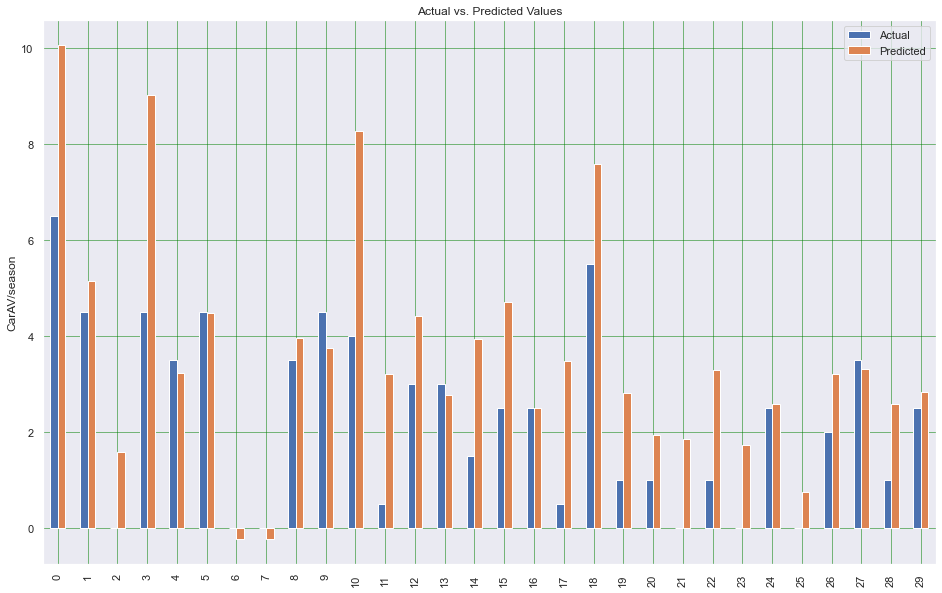

In [20]:
df_pred.head(30).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs. Predicted Values')
plt.ylabel('CarAV/season')
plt.show()

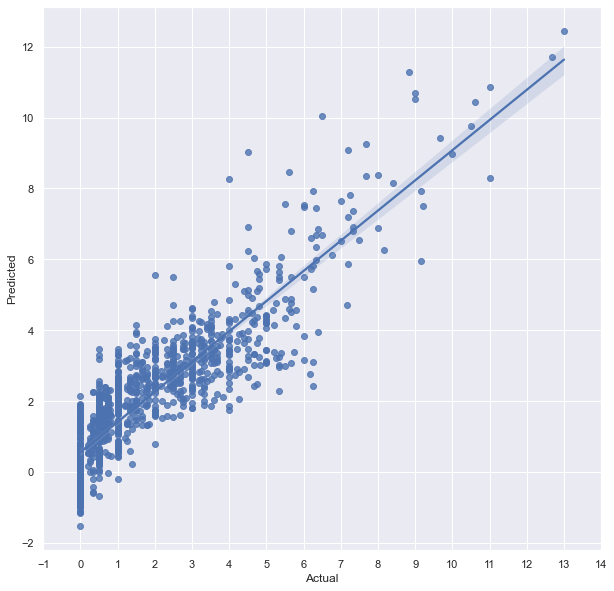

In [21]:
plt.figure(figsize=(10,10))
sns.regplot(x="Actual", y="Predicted", data=df_pred)
plt.xticks(np.arange(-1, 15, 1.0))
plt.show()

### Model 2: Simple Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=9)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred_rf)}")
print(f"Explained Variance: {metrics.explained_variance_score(y_test,y_pred_rf)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred_rf)}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf))}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred_rf)}")
r2 = metrics.r2_score(y_test,y_pred_rf)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print(f"Adjusted R2 Score: {adj_r2}")
print()

Mean Squared Error: 0.8134428788146455
Explained Variance: 0.8240529721531278
Mean Absolute Error: 0.6094838826220038
Root Mean Squared Error: 0.9019106822821457
R2 Score: 0.8108756943883626
Adjusted R2 Score: 0.8092993128105512



#### Relative Important Features

30


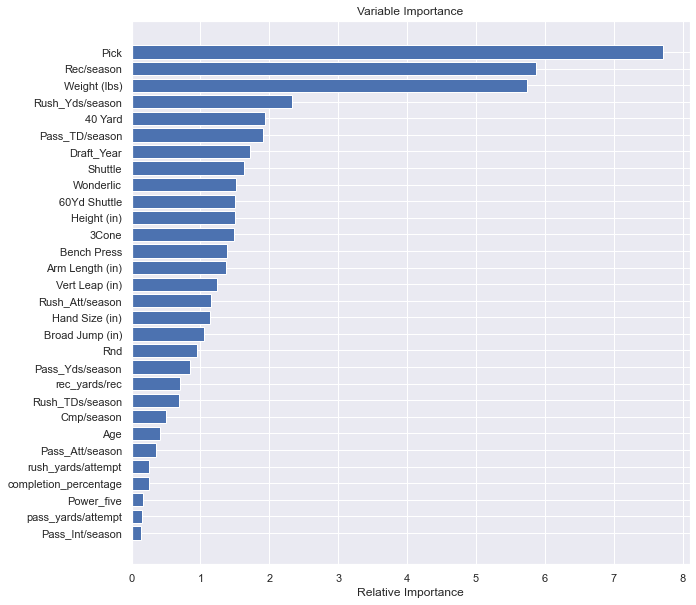

In [23]:
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Interestingly, "Pick" is the most important feature for the random forest model followed by per season, similar to the linear regression model. Weight is odd to see so high on the list and it would be interesting to delve further into it. The 40 yard dash is much higher on the list than the linear regression model as well.   

#### Visualize Model Performance

In [24]:
# Create dataframe of predicted vs. actual values
df_pred_rf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_rf.flatten()})


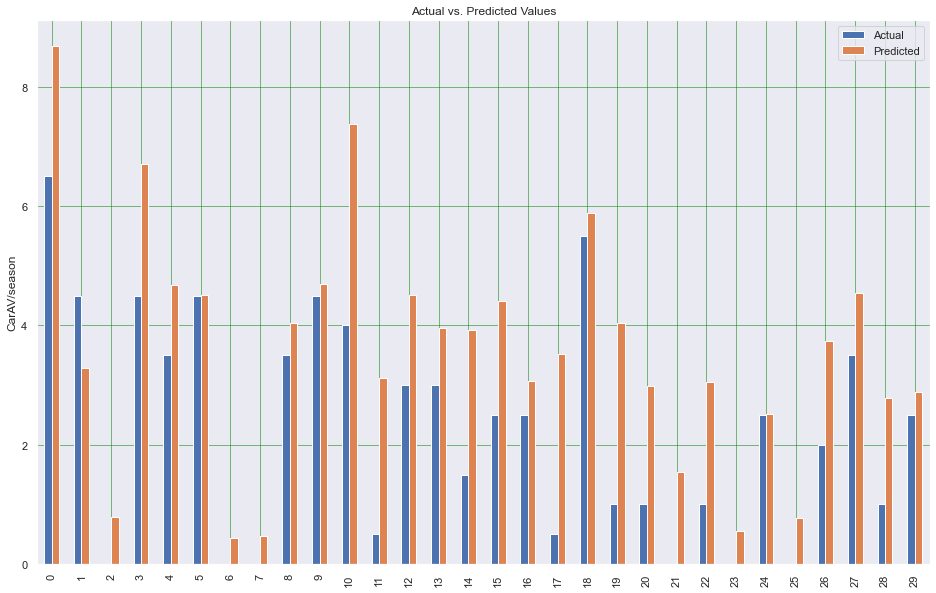

In [25]:
df_pred_rf.head(30).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs. Predicted Values')
plt.ylabel('CarAV/season')
plt.show()

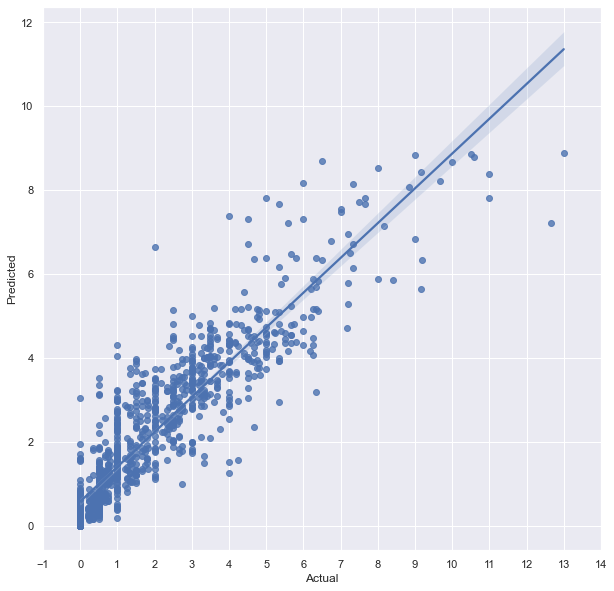

In [26]:
plt.figure(figsize=(10,10))
sns.regplot(x="Actual", y="Predicted", data=df_pred_rf)
plt.xticks(np.arange(-1, 15, 1.0))
plt.show()

### Model 3: Gradient Boosting Regressor

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=9)
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred_gb)}")
print(f"Explained Variance: {metrics.explained_variance_score(y_test,y_pred_gb)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred_gb)}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test,y_pred_gb))}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred_gb)}")
r2 = metrics.r2_score(y_test,y_pred_gb)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print(f"Adjusted R2 Score: {adj_r2}")
print()

Mean Squared Error: 0.7965065684282804
Explained Variance: 0.826354605060645
Mean Absolute Error: 0.6340878893893012
Root Mean Squared Error: 0.8924721667527119
R2 Score: 0.8148133623240781
Adjusted R2 Score: 0.81326980184334



#### Relative Important Features

30


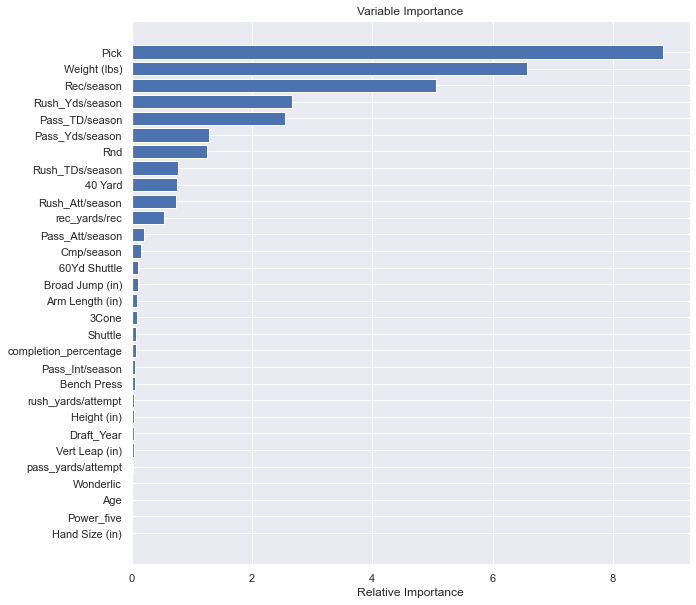

In [28]:
feature_importance = gb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Again, we see "Pick" as being the most important feaure in determing NFL success. Tha's quite surprisning considering all the statisitc swe have. Weight is even higher on the list. I wonder why that is? 

#### Visualize Model Performance

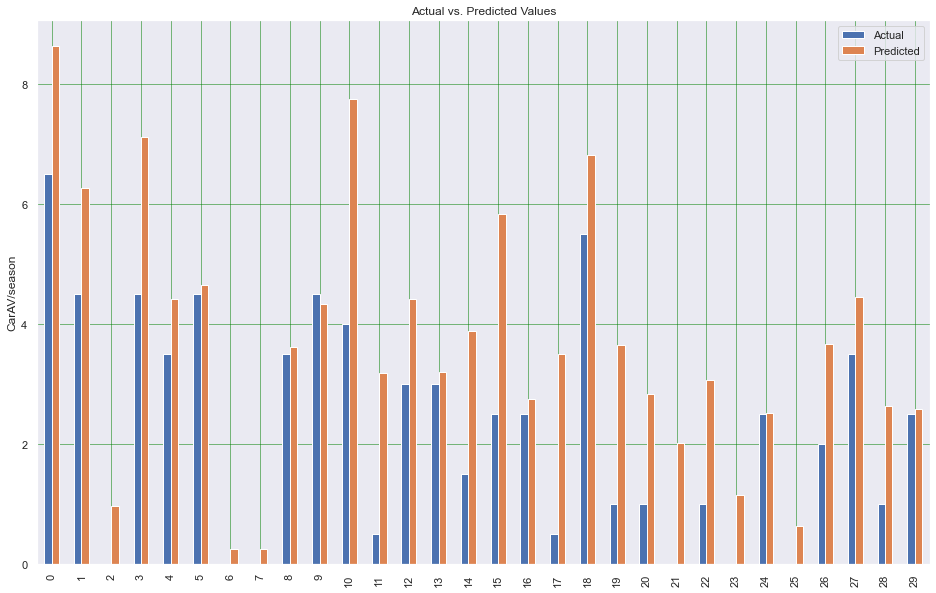

In [29]:
# Create dataframe of predicted vs. actual values
df_pred_gb = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_gb.flatten()})
df_pred_gb.head(30).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs. Predicted Values')
plt.ylabel('CarAV/season')
plt.show()

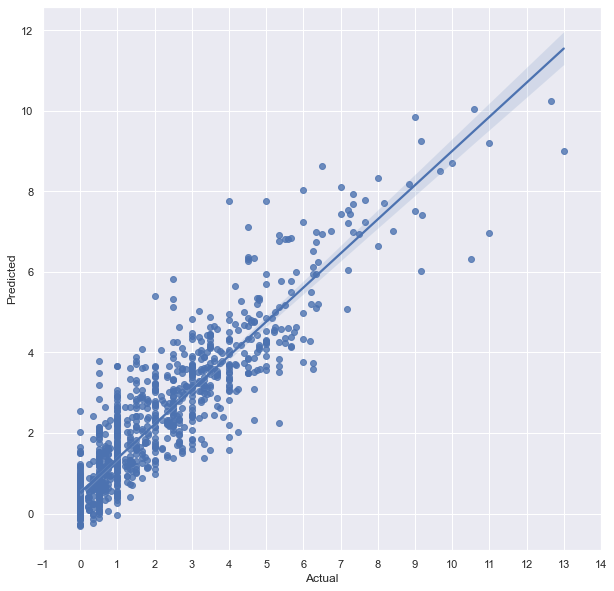

In [30]:
plt.figure(figsize=(10,10))
sns.regplot(x="Actual", y="Predicted", data=df_pred_gb)
plt.xticks(np.arange(-1, 15, 1.0))
plt.show()

### Model 4: Support Vector Regression

In [31]:
 from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_scaled,y_train)
y_pred_svr = svr.predict(X_test_scaled)
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred_svr)}")
print(f"Explained Variance: {metrics.explained_variance_score(y_test,y_pred_svr)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred_svr)}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr))}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred_svr)}")
r2 = metrics.r2_score(y_test,y_pred_svr)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print(f"Adjusted R2 Score: {adj_r2}")

Mean Squared Error: 0.9380416370826219
Explained Variance: 0.7934931350425227
Mean Absolute Error: 0.6492891687197142
Root Mean Squared Error: 0.9685254963513464
R2 Score: 0.781906661342254
Adjusted R2 Score: 0.7800888182036283


#### Visualize Model Performance

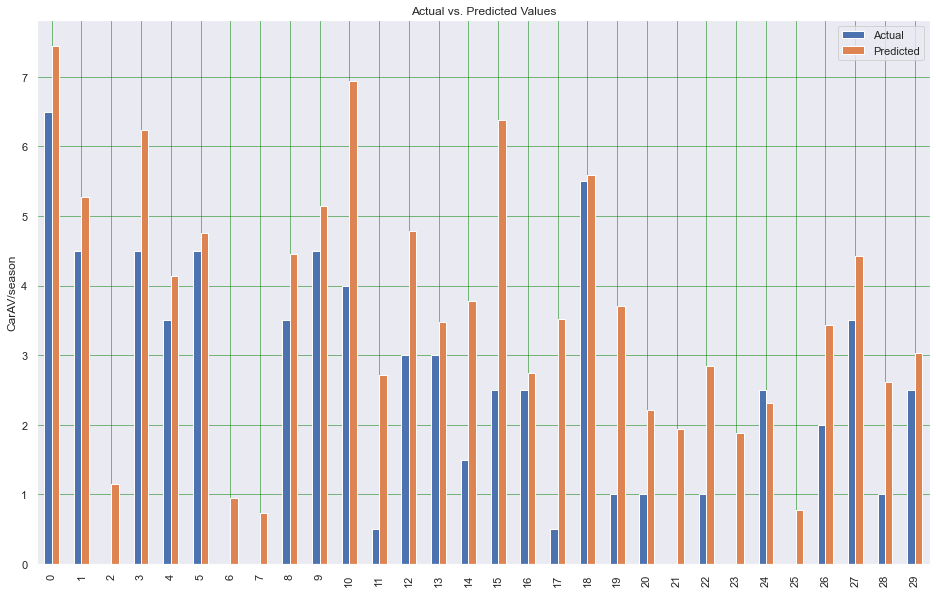

In [32]:
# Create dataframe of predicted vs. actual values
df_pred_svr = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_svr.flatten()})
df_pred_svr.head(30).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs. Predicted Values')
plt.ylabel('CarAV/season')
plt.show()

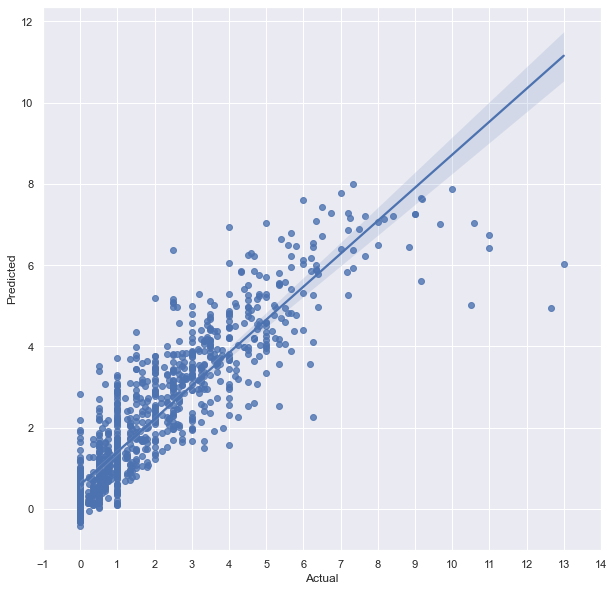

In [33]:
plt.figure(figsize=(10,10))
sns.regplot(x="Actual", y="Predicted", data=df_pred_svr)
plt.xticks(np.arange(-1, 15, 1.0))
plt.show()

### Model Recap

All in all, we saw the gradient boost model perform the best with "Pick" being its most important feature. We've established statistics like run/pass/receiving yards are all important in determining NFL success, which is what we expected. We've also established that the round and pick drafted is more important in some models, which I find somewhat surprising. Let's see if we can predict NFL success from Combine results alone. 

# Modeling: Predict NFL Success from Combine Results

The original thesis of this project is to accurately predict the success of an NFL player using only Combine results. We'll drop all of the season stats and draft information from the dataset leaving only the Combine results. 

### Split Data into Test & Train Subsamples

In [34]:
career_stats = ['AP1', 'PB', 'St', 'CarAV', 'G',
       'Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD', 'Pass_Int', 'Rush_Att',
       'Rush_Yds', 'Rush_TDs', 'Rec', 'Rec_Yds', 'Rec_Tds', 'Tkl', 'Def_Int',
       'Sk']


In [35]:
# Drop all season Statistics and draft information leaving only Combine results

X = df.drop(Stats,axis=1)
X = df.drop(['Pick','Rnd'],axis=1)
y = df['CarAV/season']

#define training sets
X_train = df[df['Draft_Year']<=2010]
X_train = X_train.drop(Stats,axis=1)
X_train = X_train.drop(['Pick','Rnd'],axis=1)
y_train = df[df['Draft_Year']<=2010]
y_train = y_train['CarAV/season'].values

#define test sets
X_test = df[df['Draft_Year']>=2011]
X_test = X_test.drop(Stats,axis=1)
X_test = X_test.drop(['Pick','Rnd'],axis=1)
y_test = df[df['Draft_Year']>=2011]
y_test = y_test['CarAV/season'].values
#y_test = y_test.reshape(-1,1)
#y_train = y_train.reshape(1,-1)


### Scale Data to Prep for Model Creation

In [36]:
#scale data
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Model 1: Simple Linear Regression 

In [37]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
print(f"Explained Variance: {metrics.explained_variance_score(y_test,y_pred)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred)}")
r2 = metrics.r2_score(y_test,y_pred)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print(f"Adjusted R2 Score: {adj_r2}")

Explained Variance: 0.07293719385877062
Mean Absolute Error: 1.7005139420566922
Mean Squared Error: 4.286470391834444
Root Mean Squared Error: 2.070379286950689
R2 Score: 0.0034017661303342717
Adjusted R2 Score: 0.00013922280688483113


#### Review model coefficeints to determine most important features

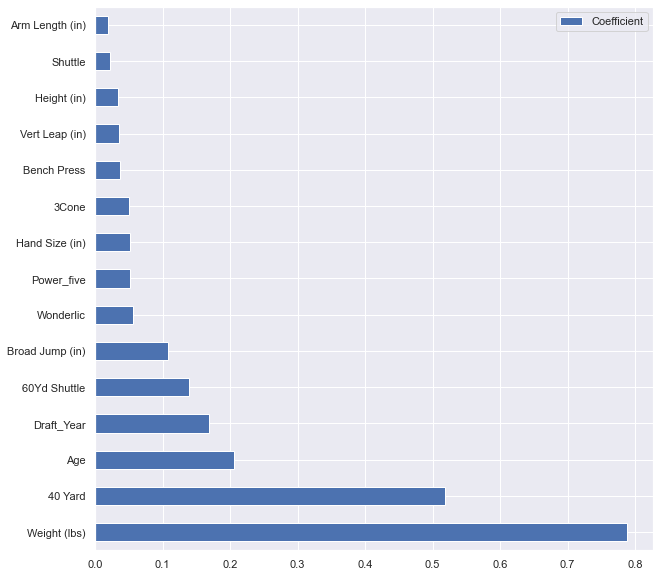

In [38]:
co_df = pd.DataFrame(abs(model.coef_), X_train.columns, columns=['Coefficient'])
co_df.sort_values(by=['Coefficient'], ascending=False,inplace=True)
co_df.head(25).plot(kind='barh',figsize=(10,10))
plt.show()

The R2 value is very low for this regression model indicating no predictive power at all. Weight and 40 yard dash are at the top of the list for the most important features but none of these features can predict approximate value very well. 

#### Visualize Model Performance

In [39]:
# Create dataframe of predicted vs. actual values
df_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

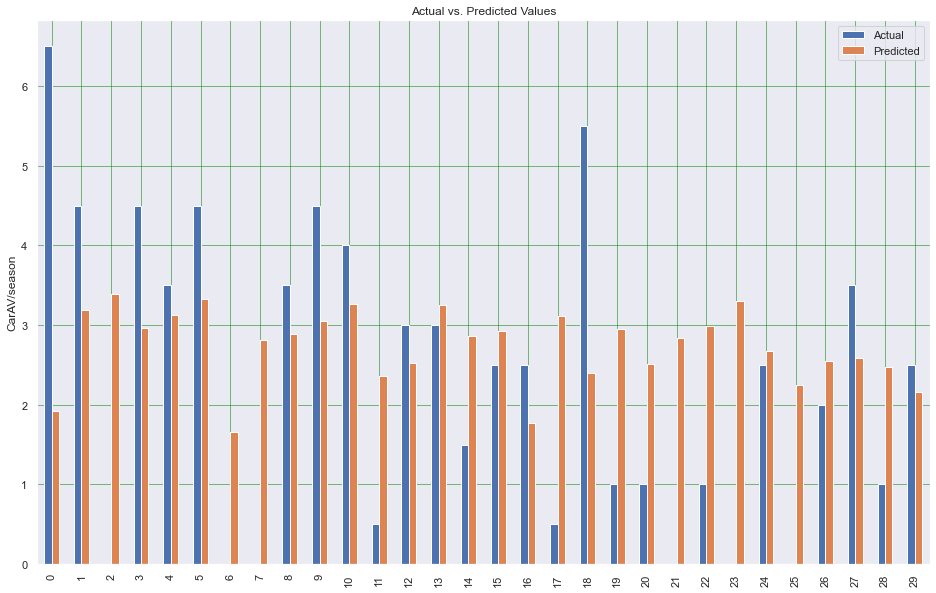

In [40]:
df_pred.head(30).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs. Predicted Values')
plt.ylabel('CarAV/season')
plt.show()

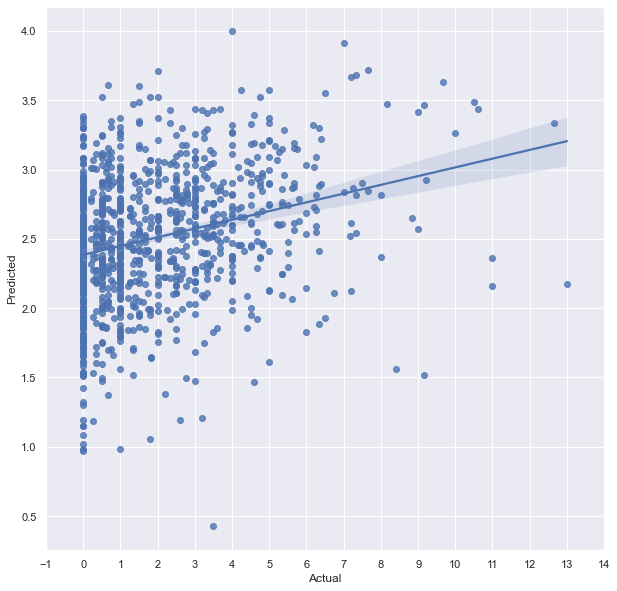

In [41]:
plt.figure(figsize=(10,10))
sns.regplot(x="Actual", y="Predicted", data=df_pred)
plt.xticks(np.arange(-1, 15, 1.0))
plt.show()

### Model 2: Simple Random Forest Regressor

In [42]:
rf = RandomForestRegressor(random_state=9)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred_rf)}")
print(f"Explained Variance: {metrics.explained_variance_score(y_test,y_pred_rf)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred_rf)}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf))}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred_rf)}")
r2 = metrics.r2_score(y_test,y_pred_rf)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print(f"Adjusted R2 Score: {adj_r2}")
print()

Mean Squared Error: 4.539431105201576
Explained Variance: 0.034091532277344294
Mean Absolute Error: 1.736584192649094
Root Mean Squared Error: 2.1305940733048088
R2 Score: -0.0554112378414966
Adjusted R2 Score: -0.058866316097197835



#### Relative Important Features

15


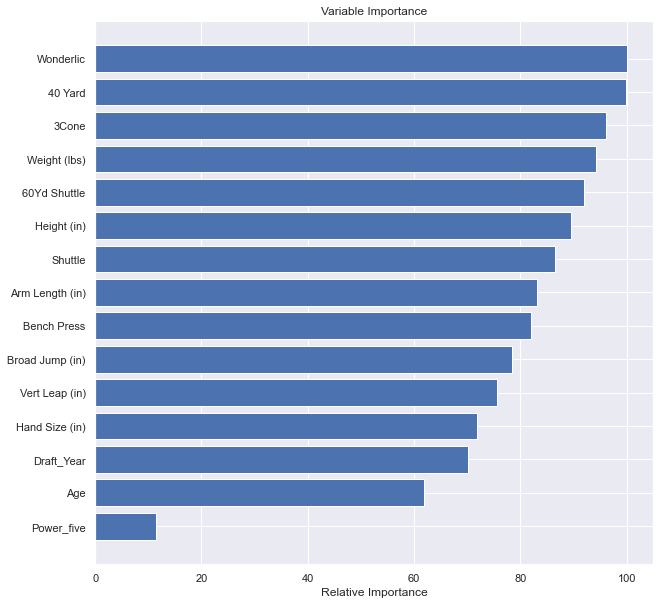

In [43]:
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

This model has a negative R2 value whih implies the model is worse at predicting approximate value than simply picking the mean. In short, this model is useless.

#### Visualize Model Performance

In [44]:
# Create dataframe of predicted vs. actual values
df_pred_rf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_rf.flatten()})


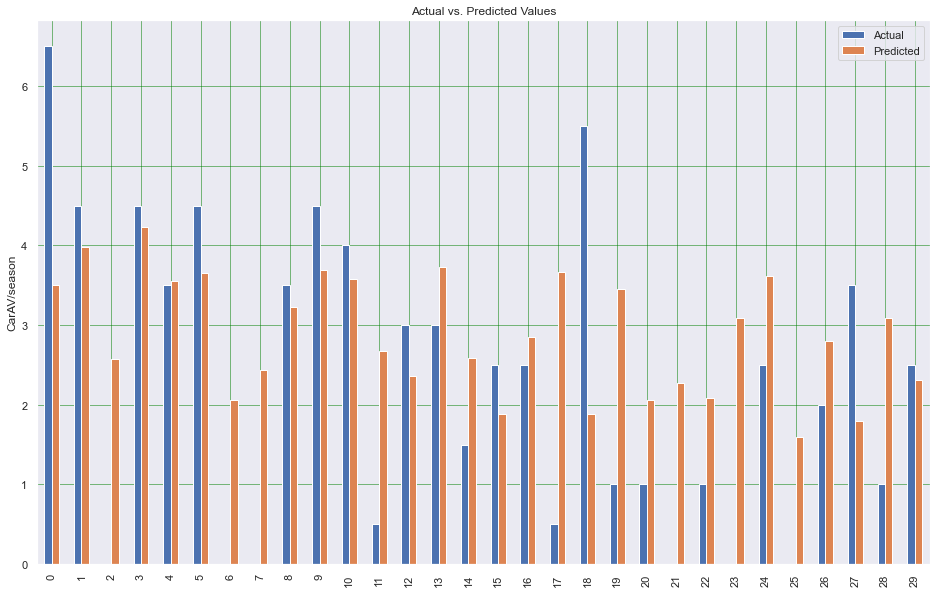

In [45]:
df_pred_rf.head(30).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs. Predicted Values')
plt.ylabel('CarAV/season')
plt.show()

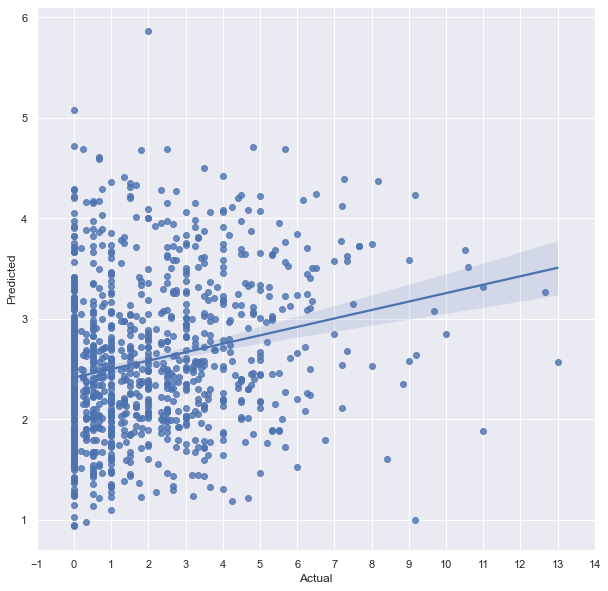

In [46]:
plt.figure(figsize=(10,10))
sns.regplot(x="Actual", y="Predicted", data=df_pred_rf)
plt.xticks(np.arange(-1, 15, 1.0))
plt.show()

### Model 3: Gradient Boosting Regressor

In [47]:
gb = GradientBoostingRegressor(random_state=9)
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred_gb)}")
print(f"Explained Variance: {metrics.explained_variance_score(y_test,y_pred_gb)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred_gb)}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test,y_pred_gb))}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred_gb)}")
r2 = metrics.r2_score(y_test,y_pred_gb)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print(f"Adjusted R2 Score: {adj_r2}")
print()

Mean Squared Error: 4.304597111256264
Explained Variance: 0.0508166952984026
Mean Absolute Error: 1.6873645161400084
Root Mean Squared Error: 2.0747523011810984
R2 Score: -0.0008126702031232558
Adjusted R2 Score: -0.004089010240889923



#### Relative Important Features

15


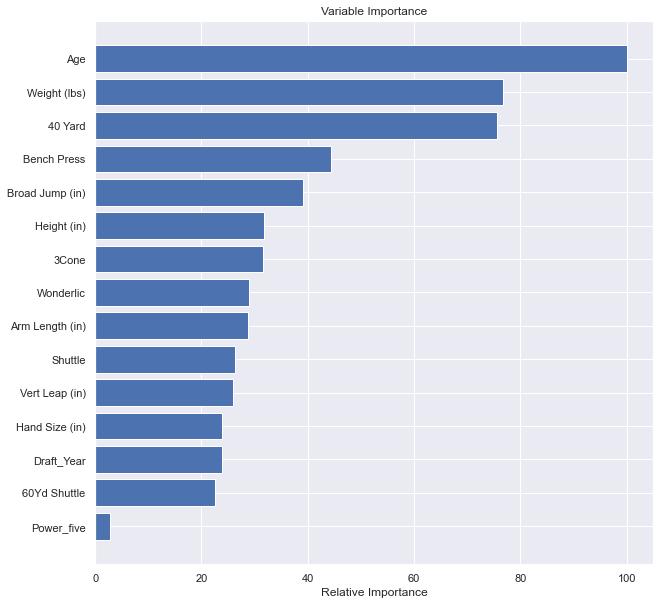

In [48]:
feature_importance = gb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Again, this model's R2 value is negative, indicating the model does not follow the trend of the data, so fits worse than a horizontal line. 

#### Visualize Model Performance

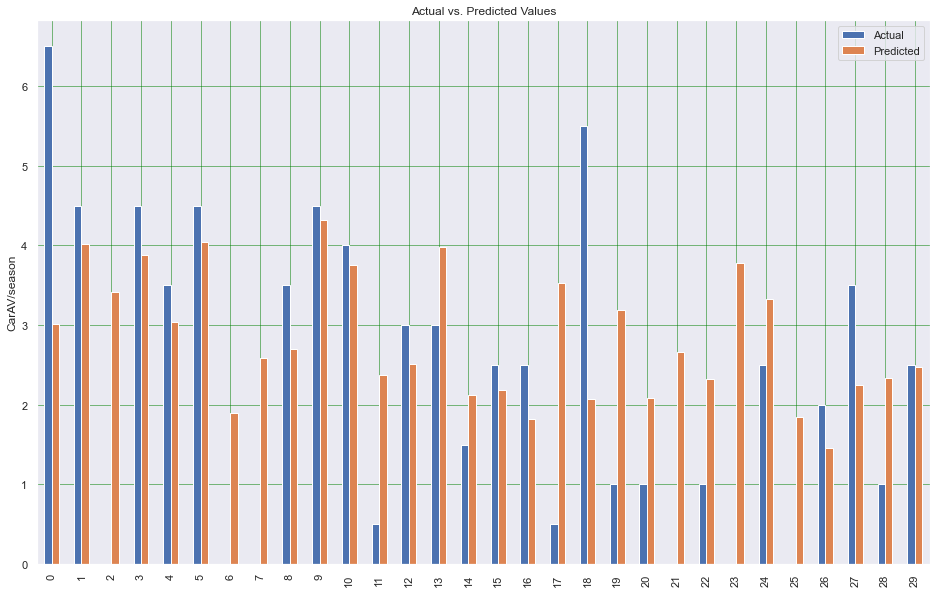

In [49]:
# Create dataframe of predicted vs. actual values
df_pred_gb = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_gb.flatten()})
df_pred_gb.head(30).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs. Predicted Values')
plt.ylabel('CarAV/season')
plt.show()

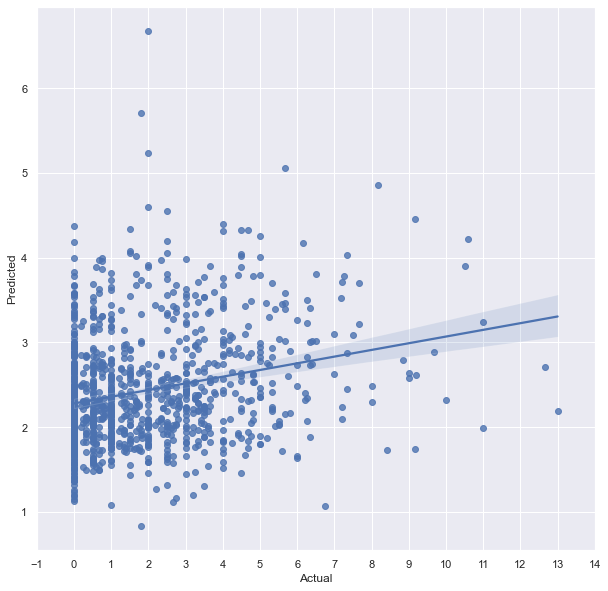

In [50]:
plt.figure(figsize=(10,10))
sns.regplot(x="Actual", y="Predicted", data=df_pred_gb)
plt.xticks(np.arange(-1, 15, 1.0))
plt.show()

### Model 4: Support Vector Regression

In [51]:
 from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_scaled,y_train)
y_pred_svr = svr.predict(X_test_scaled)
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred_svr)}")
print(f"Explained Variance: {metrics.explained_variance_score(y_test,y_pred_svr)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred_svr)}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr))}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred_svr)}")
r2 = metrics.r2_score(y_test,y_pred_svr)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print(f"Adjusted R2 Score: {adj_r2}")

Mean Squared Error: 4.0618989935255305
Explained Variance: 0.055614359576708794
Mean Absolute Error: 1.5333067606899182
Root Mean Squared Error: 2.0154153402029893
R2 Score: 0.055614294964931754
Adjusted R2 Score: 0.052522678732822126


#### Visualize Model Performance

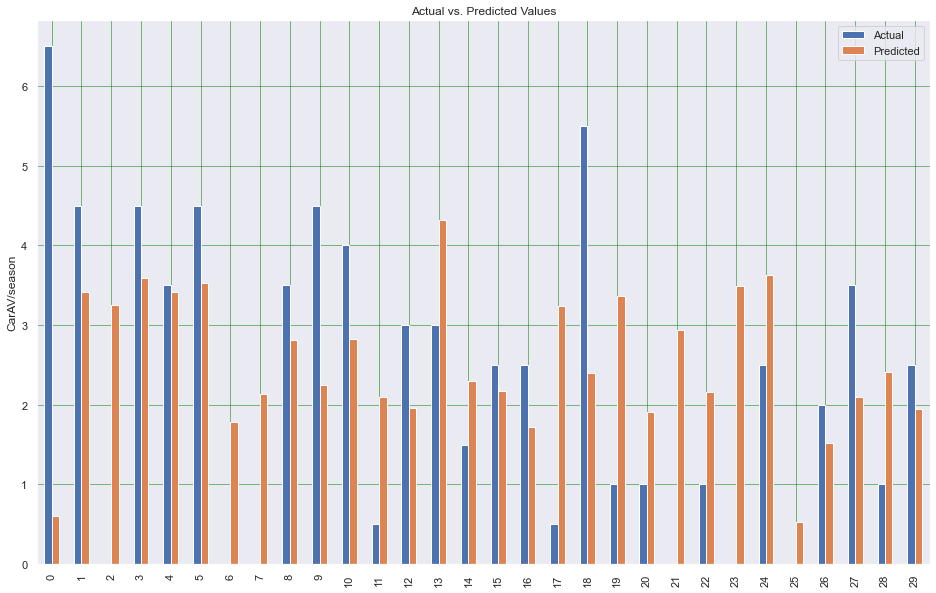

In [52]:
# Create dataframe of predicted vs. actual values
df_pred_svr = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_svr.flatten()})
df_pred_svr.head(30).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs. Predicted Values')
plt.ylabel('CarAV/season')
plt.show()

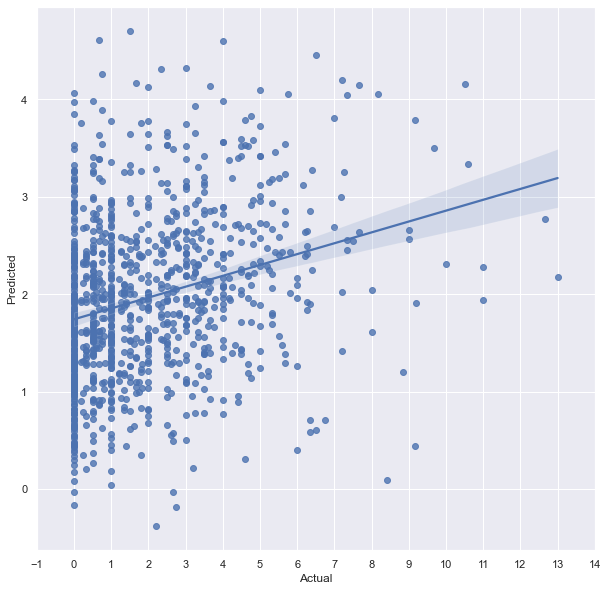

In [53]:
plt.figure(figsize=(10,10))
sns.regplot(x="Actual", y="Predicted", data=df_pred_svr)
plt.xticks(np.arange(-1, 15, 1.0))
plt.show()

The R2 value is still very low but it might be improved by optimizing hyperparameters. At its current state the model explains 5% of the variation in the response variable around its mean.

In [54]:
# Use Gridsearch to determine the best parameters for model optimization.
from sklearn.model_selection import GridSearchCV
#parameters = {'C':[0.1, 1, 10,100], 'epsilon':[0.00001, 0.0001, 0.001, 0.01, 0.1,1,10,100],'gamma':['scale',.001,.01,1,10,100]}
#searcher = GridSearchCV(svr, parameters,cv=5)
#searcher.fit(X_train_scaled, y_train)

# Report the best parameters and the corresponding score
#print("Best CV params", searcher.best_params_)
#print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
#print("Test accuracy of best grid search hypers:", searcher.score(X_test_scaled, y_test))

In [55]:
# Apply best parameters to the model
svr = SVR(epsilon=1, C=10,gamma=.01)
svr.fit(X_train_scaled,y_train)
y_pred_svr = svr.predict(X_test_scaled)
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred_svr)}")
print(f"Explained Variance: {metrics.explained_variance_score(y_test,y_pred_svr)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred_svr)}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr))}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred_svr)}")
r2 = metrics.r2_score(y_test,y_pred_svr)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print(f"Adjusted R2 Score: {adj_r2}")


Mean Squared Error: 3.958244851101525
Explained Variance: 0.08271730493419227
Mean Absolute Error: 1.5517053469230955
Root Mean Squared Error: 1.9895338275841215
R2 Score: 0.0797137347907203
Adjusted R2 Score: 0.07670101240352267


#### Visualize Model Performance

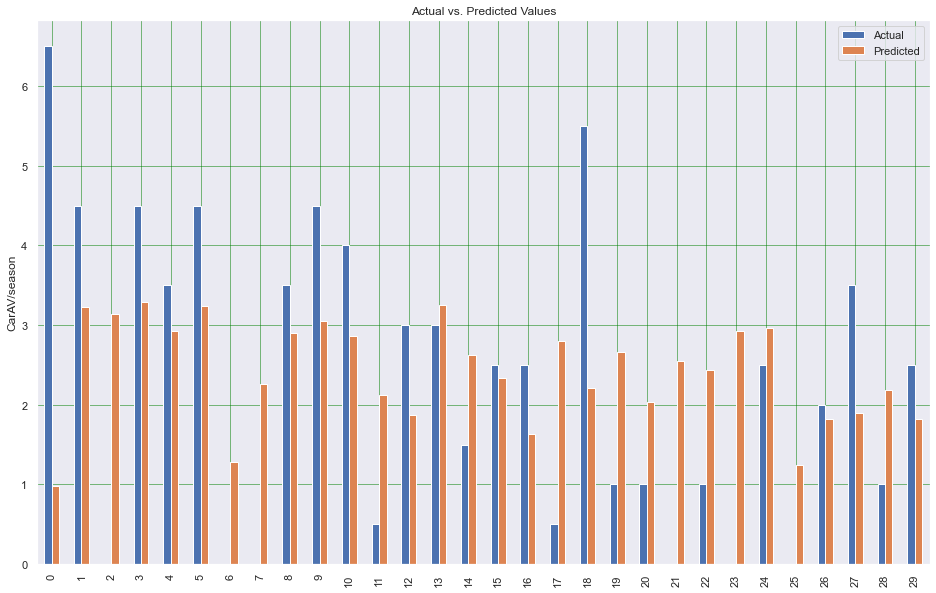

In [56]:
# Create dataframe of predicted vs. actual values
df_pred_svr = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_svr.flatten()})
df_pred_svr.head(30).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs. Predicted Values')
plt.ylabel('CarAV/season')
plt.show()

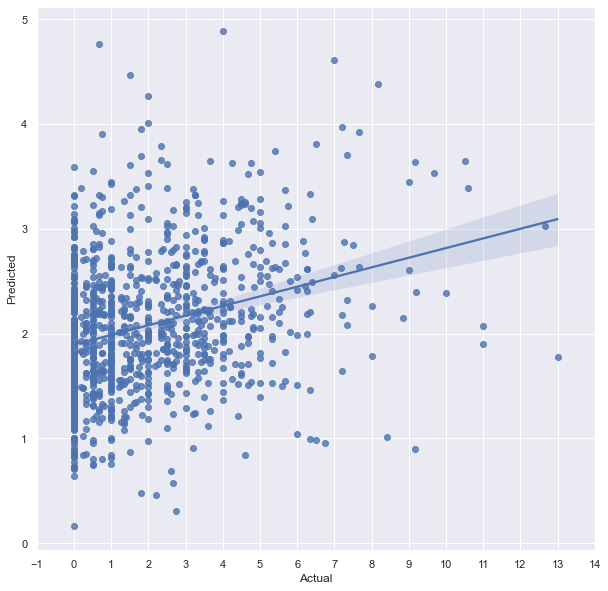

In [57]:
plt.figure(figsize=(10,10))
sns.regplot(x="Actual", y="Predicted", data=df_pred_svr)
plt.xticks(np.arange(-1, 15, 1.0))
plt.show()

### Model Recap

We were able to increase the R2 score by a little over 2% by tweaking our model but it appears NFL Combine results have very little predictive power in determining NFL success. Let's see if Combine results have any predictive power in determining draft position. 

# Modeling: Predict Draft Position from Combine Results

We've determined that the NFL Combine cannot accurately predict a players NFL success but can a good showing at the Combine increase your chances of getting drafted earlier?
Now that the relationship between draft order and NFL performance 
is established, we now attempt to examine how the Combine results and the draft order are tied
together.
If we can show that having good Combine results have positive effects improving
one's chance of being drafted early or being drafted at all, then we could safely assume that
the effects are being carried over to one's NFL performance, since we have already made it
clear of the relationship between draft order and NFL performance. 

### Split Data into Test & Train Subsamples

In [366]:
# Drop all season Statistics and draft information leaving only Combine results

X = df.drop(Stats,axis=1)
X = df.drop(['Pick','Rnd'],axis=1)
y = df['Pick']

#define training sets
X_train = df[df['Draft_Year']<=2010]
X_train = X_train.drop(Stats,axis=1)
X_train = X_train.drop(['Pick','Rnd'],axis=1)
y_train = df[df['Draft_Year']<=2010]
# Change our target variabel to 'Pick'
y_train = y_train['Pick'].values

#define test sets
X_test = df[df['Draft_Year']>=2011]
X_test = X_test.drop(Stats,axis=1)
X_test = X_test.drop(['Pick','Rnd'],axis=1)
y_test = df[df['Draft_Year']>=2011]
y_test = y_test['Pick'].values
#y_test = y_test.reshape(-1,1)
#y_train = y_train.reshape(1,-1)


### Scale Data to Prep for Model Creation

In [367]:
#scale data
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Model 1: Simple Linear Regression 

In [368]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
print(f"Explained Variance: {metrics.explained_variance_score(y_test,y_pred)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred)}")
r2 = metrics.r2_score(y_test,y_pred)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print(f"Adjusted R2 Score: {adj_r2}")

Explained Variance: 0.09316098312084453
Mean Absolute Error: 57.68447690890463
Mean Squared Error: 4713.283223352543
Root Mean Squared Error: 68.65335551415198
R2 Score: 0.0744587396829226
Adjusted R2 Score: 0.07142881412535895


#### Review model coefficeints to determine most important features

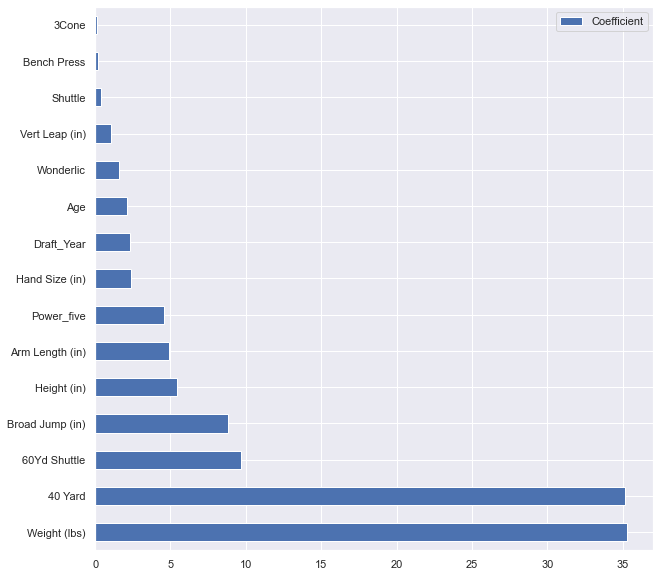

In [369]:
co_df = pd.DataFrame(abs(model.coef_), X_train.columns, columns=['Coefficient'])
co_df.sort_values(by=['Coefficient'], ascending=False,inplace=True)
co_df.head(25).plot(kind='barh',figsize=(10,10))
plt.show()

Again the R2 value is very low for this regression model indicating little predictive power. Weight and 40 Yard dash are  the most important features again. 

#### Visualize Model Performance

In [370]:
# Create dataframe of predicted vs. actual values
df_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

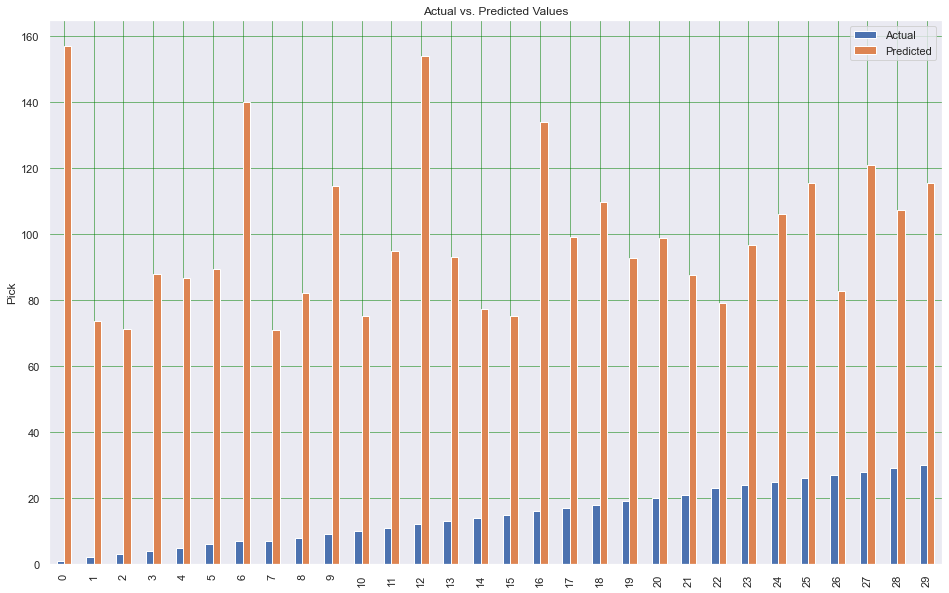

In [371]:
df_pred.head(30).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs. Predicted Values')
plt.ylabel('Pick')
plt.show()

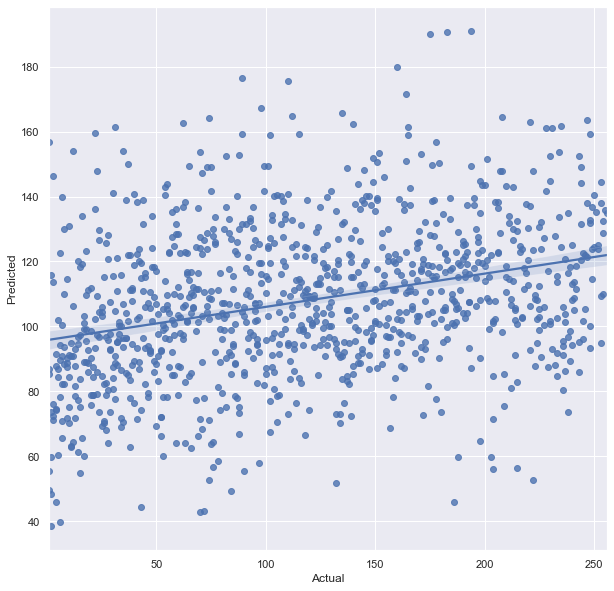

In [372]:
plt.figure(figsize=(10,10))
sns.regplot(x="Actual", y="Predicted", data=df_pred)
#plt.xticks(np.arange(-1, 15, 1.0))
plt.show()

### Model 2: Simple Random Forest Regressor

In [373]:
rf = RandomForestRegressor(random_state=9)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred_rf)}")
print(f"Explained Variance: {metrics.explained_variance_score(y_test,y_pred_rf)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred_rf)}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf))}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred_rf)}")
r2 = metrics.r2_score(y_test,y_pred_rf)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print(f"Adjusted R2 Score: {adj_r2}")


Mean Squared Error: 4710.553915901282
Explained Variance: 0.07890581189841894
Mean Absolute Error: 57.33555829346093
Root Mean Squared Error: 68.6334751844993
R2 Score: 0.07499469021645222
Adjusted R2 Score: 0.07196651918922536


#### Relative Important Features

15


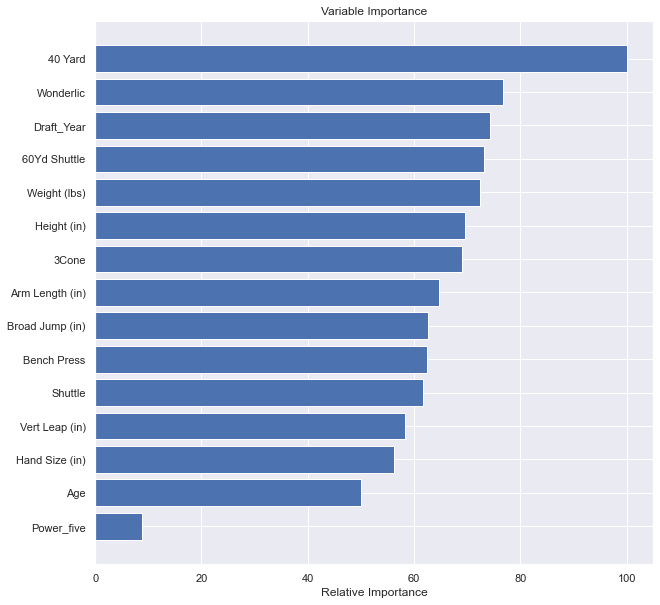

In [374]:
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

40 yard dash is the most important feature again.

#### Visualize Model Performance

In [375]:
# Create dataframe of predicted vs. actual values
df_pred_rf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_rf.flatten()})


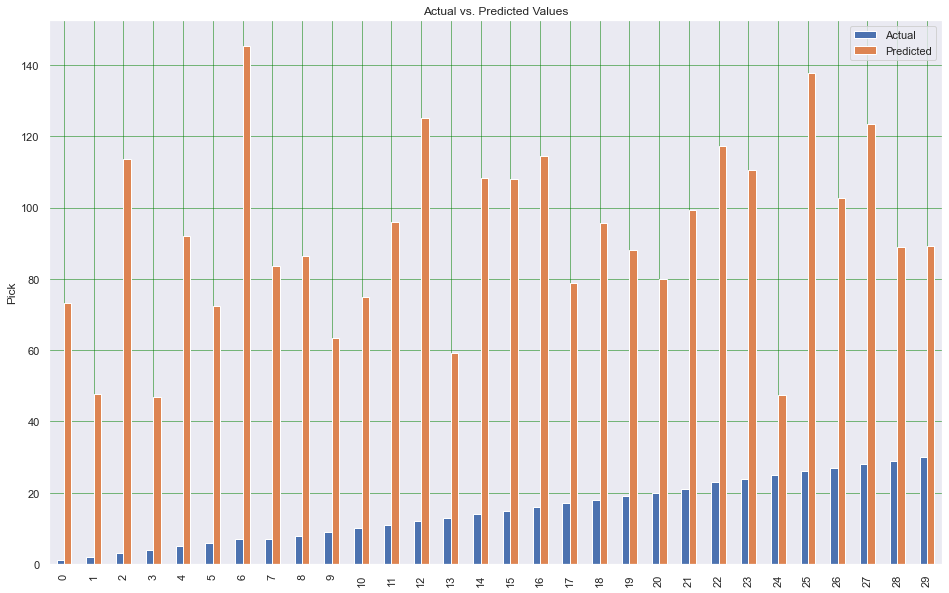

In [376]:
df_pred_rf.head(30).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs. Predicted Values')
plt.ylabel('Pick')
plt.show()

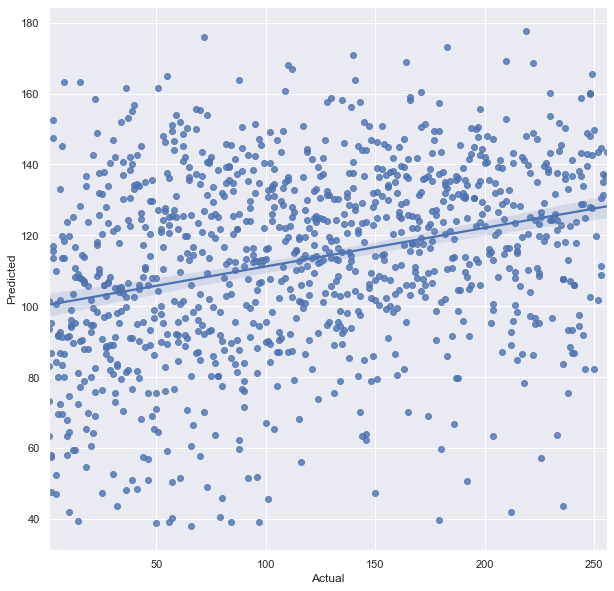

In [377]:
plt.figure(figsize=(10,10))
sns.regplot(x="Actual", y="Predicted", data=df_pred_rf)
#plt.xticks(np.arange(-1, 15, 1.0))
plt.show()

### Model 3: Gradient Boosting Regressor

In [378]:
gb = GradientBoostingRegressor(random_state=9)
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred_gb)}")
print(f"Explained Variance: {metrics.explained_variance_score(y_test,y_pred_gb)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred_gb)}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test,y_pred_gb))}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred_gb)}")
r2 = metrics.r2_score(y_test,y_pred_gb)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print(f"Adjusted R2 Score: {adj_r2}")
print()

Mean Squared Error: 4609.179085553951
Explained Variance: 0.10230611172293769
Mean Absolute Error: 56.88000573761579
Root Mean Squared Error: 67.89093522373919
R2 Score: 0.09490153302598758
Adjusted R2 Score: 0.09193853062428303



#### Relative Important Features

15


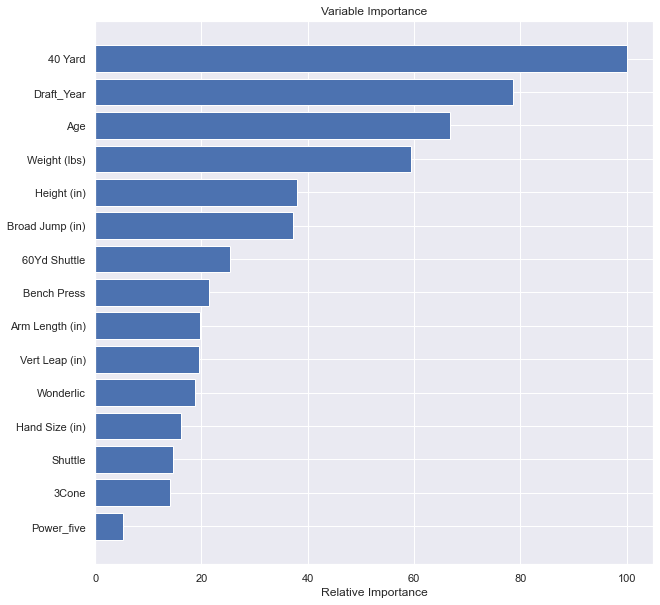

In [379]:
feature_importance = gb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

#### Visualize Model Performance

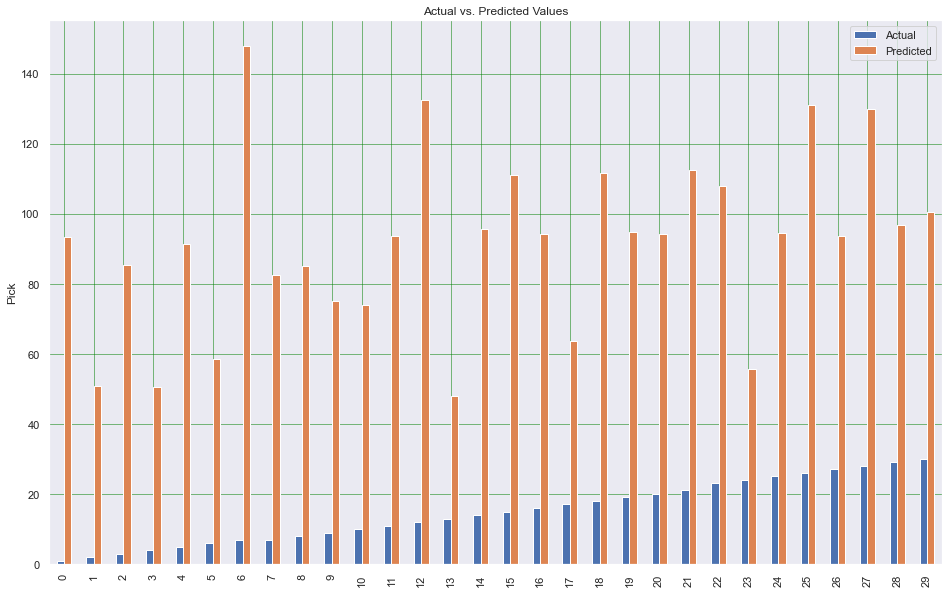

In [380]:
# Create dataframe of predicted vs. actual values
df_pred_gb = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_gb.flatten()})
df_pred_gb.head(30).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs. Predicted Values')
plt.ylabel('Pick')
plt.show()

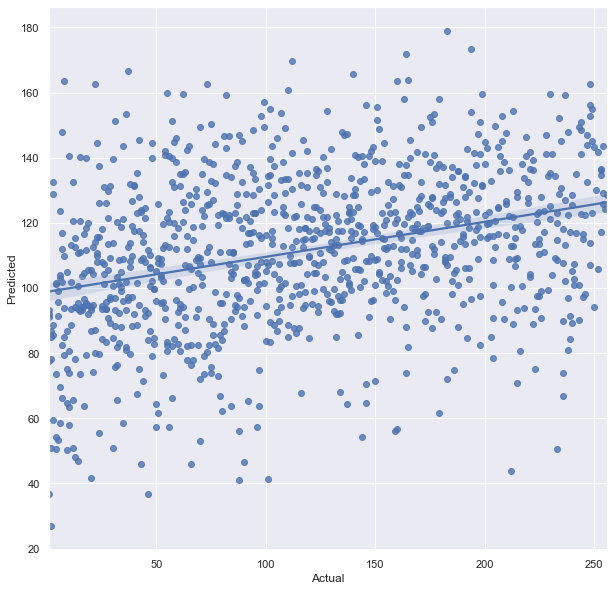

In [381]:
plt.figure(figsize=(10,10))
sns.regplot(x="Actual", y="Predicted", data=df_pred_gb)
#plt.xticks(np.arange(-1, 15, 1.0))
plt.show()

### Model 4: Support Vector Regression

In [ ]:
 from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_scaled,y_train)
y_pred_svr = svr.predict(X_test_scaled)
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred_svr)}")
print(f"Explained Variance: {metrics.explained_variance_score(y_test,y_pred_svr)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred_svr)}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr))}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred_svr)}")
r2 = metrics.r2_score(y_test,y_pred_svr)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print(f"Adjusted R2 Score: {adj_r2}")

#### Visualize Model Performance

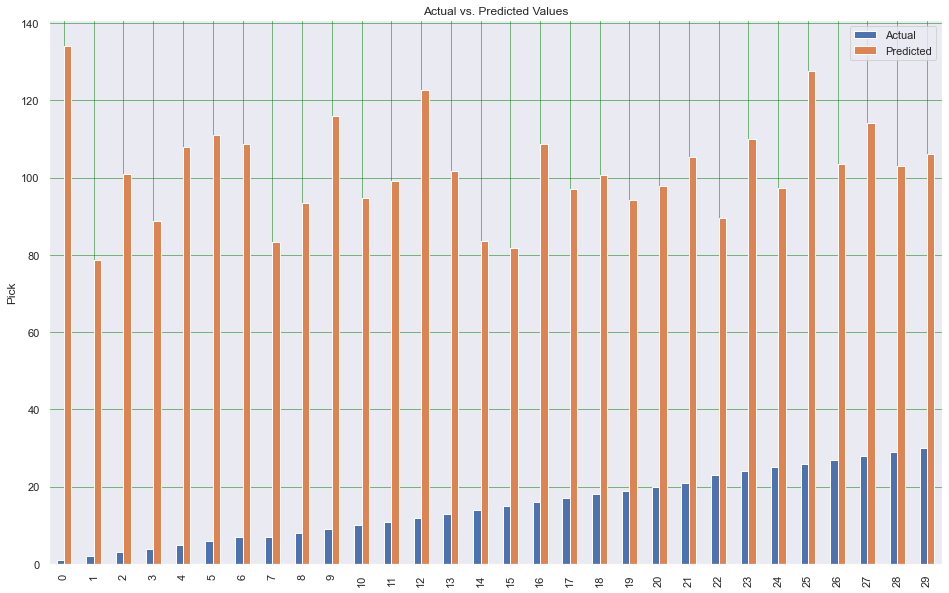

In [350]:
# Create dataframe of predicted vs. actual values
df_pred_svr = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_svr.flatten()})
df_pred_svr.head(30).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs. Predicted Values')
plt.ylabel('Pick')
plt.show()

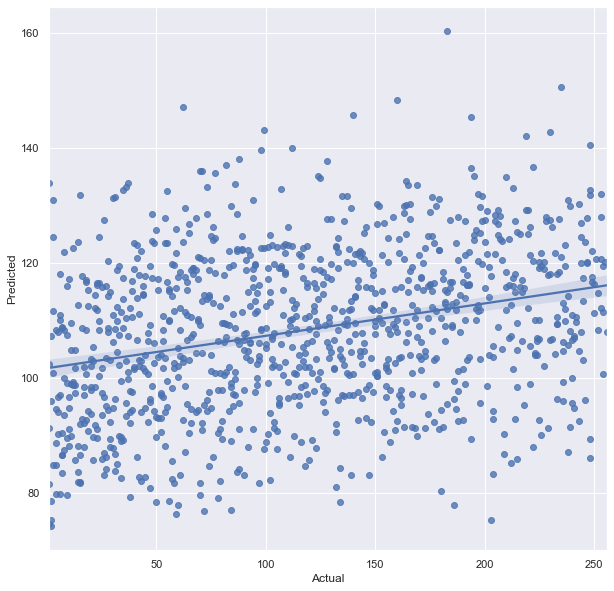

In [351]:
plt.figure(figsize=(10,10))
sns.regplot(x="Actual", y="Predicted", data=df_pred_svr)
#plt.xticks(np.arange(-1, 280, 21))
#plt.yticks(np.arange(-1, 280, 21))
plt.show()

### Model 5: Tuning Gradient Boost

We've had the most success predicting draft position using the Gradient Boosting model. Let's see if we can tune the hyperparameters to improve the model. 

In [383]:
parameters = {'learning_rate': [0.1, 0.05, 0.02, 0.01,1],
              'max_depth': [3, 1, 6,10],
              'min_samples_leaf': [1,10, 50],
              'max_features': [1.0, 10,'auto','sqrt','log2'],
              'n_estimators':[100,200,500],
              'subsample': [1,.3,.7],
              
              }
searcher = GridSearchCV(gb, parameters,cv=5,verbose=10)
searcher.fit(X_train_scaled, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test_scaled, y_test))

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1, score=-1.814, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.065, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.132, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1, score=-0.687, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.3s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1, score=-0.295, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.3 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.1s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=-1.169, total=   0.3s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.3 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.4s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=0.041, total=   0.4s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.3 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.8s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=0.106, total=   0.4s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.3 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.2s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=-0.492, total=   0.4s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.3 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.6s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=-0.262, total=   0.5s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-1.512, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=0.057, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=0.135, total=   0.7s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.

[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-1.095, total=   3.9s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-0.354, total=   3.6s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1, score=-1.837, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1, score=0.067, total=   1.0s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, m

[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=1, score=0.092, total=   5.3s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=1, score=-0.964, total=   5.8s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=1, score=-0.357, total=   6.3s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.958, total=   2.9s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1

[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=0.013, total=   0.7s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=0.097, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-0.374, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-0.062, total=   0.7s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning

[CV]  learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-1.332, total=   0.6s
[CV] learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=0.056, total=   0.6s
[CV] learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=0.130, total=   0.7s
[CV] learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.548, total=   0.7s
[CV] learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_d

[CV]  learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-0.401, total=   5.9s
[CV] learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=1, score=-1.959, total=   1.4s
[CV] learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=1, score=0.062, total=   1.4s
[CV] learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=1, score=0.135, total=   1.4s
[CV] learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=3,

[CV]  learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=1, score=-0.870, total=   6.5s
[CV] learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=1, score=-0.430, total=   6.0s
[CV] learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.976, total=   2.0s
[CV] learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.036, total=   1.9s
[CV] learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, m

[CV]  learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=0.104, total=   1.3s
[CV] learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-0.354, total=   1.2s
[CV] learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-0.071, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.058, total=   1.8s
[CV] learning_rate=0.1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.

[CV]  learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=0.057, total=   1.0s
[CV] learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=0.135, total=   1.0s
[CV] learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.587, total=   1.1s
[CV] learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.332, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_r

[CV]  learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=1, score=-1.837, total=   1.6s
[CV] learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=1, score=0.067, total=   1.3s
[CV] learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=1, score=0.134, total=   1.2s
[CV] learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.722, total=   1.5s
[CV] learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.

[CV]  learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=1, score=-0.357, total=   6.7s
[CV] learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.958, total=   2.5s
[CV] learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.039, total=   2.6s
[CV] learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.027, total=   3.3s
[CV] learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  l

[CV]  learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-0.374, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-0.062, total=   0.7s
[CV] learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.073, total=   1.4s
[CV] learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.035, total=   1.4s
[CV] learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  

[CV]  learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=0.125, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.250, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.310, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1, score=-2.198, total=   0.5s
[CV] learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate

[CV]  learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=1, score=0.064, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=1, score=0.130, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.297, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.308, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=

[CV]  learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.197, total=   0.7s
[CV] learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.025, total=   0.7s
[CV] learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.051, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.631, total=   0.7s
[CV] learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV] 

[CV]  learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-0.015, total=   0.4s
[CV] learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.090, total=   0.5s
[CV] learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.052, total=   0.4s
[CV] learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.119, total=   0.4s
[CV] learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  l

[CV]  learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.250, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.310, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1, score=-2.198, total=   0.5s
[CV] learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.065, total=   0.5s
[CV] learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1

[CV]  learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1, score=0.130, total=   0.3s
[CV] learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.297, total=   0.3s
[CV] learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.308, total=   0.3s
[CV] learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.070, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_r

[CV]  learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.025, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.051, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.631, total=   0.7s
[CV] learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.382, total=   0.7s
[CV] learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV] 

[CV]  learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.090, total=   0.5s
[CV] learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.052, total=   0.5s
[CV] learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.119, total=   0.7s
[CV] learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-0.478, total=   0.6s
[CV] learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  l

[CV]  learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.267, total=   0.3s
[CV] learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1, score=-1.396, total=   0.7s
[CV] learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.061, total=   0.7s
[CV] learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.106, total=   0.7s
[CV] learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=1

[CV]  learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.016, total=   0.3s
[CV] learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.300, total=   0.3s
[CV] learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.071, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.060, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=

[CV]  learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.134, total=   0.8s
[CV] learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.257, total=   0.7s
[CV] learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.286, total=   0.7s
[CV] learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-1.854, total=   1.3s
[CV] learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learnin

[CV]  learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.060, total=   0.5s
[CV] learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.118, total=   0.5s
[CV] learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-0.092, total=   0.5s
[CV] learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-0.296, total=   0.5s
[CV] learning_rate=0.1, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_r

[CV]  learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1, score=-1.391, total=   0.5s
[CV] learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.060, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.106, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.087, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, max_feat

[CV]  learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.305, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.071, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.054, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.103, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, 

[CV]  learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.214, total=   0.6s
[CV] learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.276, total=   0.6s
[CV] learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-1.844, total=   0.9s
[CV] learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=0.058, total=   1.0s
[CV] learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0

[CV]  learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.115, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-0.074, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-0.269, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=1, score=0.099, total=   1.0s
[CV] learning_rate=0.1, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max

[CV]  learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.061, total=   0.6s
[CV] learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.106, total=   0.6s
[CV] learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.098, total=   0.6s
[CV] learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.324, total=   0.6s
[CV] learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max

[CV]  learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.060, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.100, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-0.034, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-0.214, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  

[CV]  learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-1.854, total=   1.2s
[CV] learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=0.061, total=   1.2s
[CV] learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=0.139, total=   1.2s
[CV] learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-0.318, total=   1.2s
[CV] learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  

[CV]  learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-0.296, total=   0.5s
[CV] learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=1, score=0.099, total=   1.4s
[CV] learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=1, score=0.069, total=   1.4s
[CV] learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=1, score=0.134, total=   1.5s
[CV] learning_rate=0.1, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=0

[CV]  learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.054, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.288, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=-0.500, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=0.043, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate

[CV]  learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.008, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-0.125, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=-0.718, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=0.056, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  

[CV]  learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=0.133, total=   0.6s
[CV] learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-0.126, total=   0.5s
[CV] learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-0.313, total=   0.5s
[CV] learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=1, score=0.092, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learni

[CV]  learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=1, score=0.065, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=1, score=0.133, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=1, score=-0.170, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=1, score=-0.332, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=

[CV]  learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=0.043, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=0.108, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=-0.009, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=-0.236, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning

[CV]  learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=0.056, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=0.082, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=-0.003, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=-0.243, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  le

[CV]  learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=1, score=0.086, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=1, score=-0.018, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=1, score=-0.279, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.092, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_r

[CV]  learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=0.048, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=0.127, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-0.109, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-0.095, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  

[CV]  learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-1.999, total=   2.2s
[CV] learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=0.012, total=   2.5s
[CV] learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=0.044, total=   2.4s
[CV] learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-1.073, total=   2.6s
[CV] learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.

[CV]  learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=-0.344, total=   1.1s
[CV] learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1, score=-2.146, total=   3.0s
[CV] learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1, score=0.035, total=   3.1s
[CV] learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1, score=0.065, total=   3.0s
[CV] learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max

[CV]  learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=1, score=-1.039, total=   1.4s
[CV] learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=1, score=-0.431, total=   1.4s
[CV] learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.042, total=   0.4s
[CV] learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.021, total=   0.4s
[CV] learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=

[CV]  learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-0.009, total=   2.1s
[CV] learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-0.841, total=   2.1s
[CV] learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-0.272, total=   2.1s
[CV] learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.020, total=   5.2s
[CV] learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learni

[CV]  learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.009, total=   1.6s
[CV] learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=0.046, total=   1.5s
[CV] learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-1.012, total=   1.5s
[CV] learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.365, total=   1.5s
[CV] learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_de

[CV]  learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1, score=-2.198, total=   2.1s
[CV] learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1, score=0.025, total=   2.1s
[CV] learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1, score=0.058, total=   2.1s
[CV] learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1, score=-1.023, total=   2.1s
[CV] learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=6, 

[CV]  learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=1, score=-0.417, total=   0.9s
[CV] learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.029, total=   0.3s
[CV] learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.035, total=   0.3s
[CV] learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.089, total=   0.3s
[CV] learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, 

[CV]  learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-0.842, total=   1.5s
[CV] learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-0.204, total=   1.5s
[CV] learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.074, total=   3.5s
[CV] learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.054, total=   3.5s
[CV] learning_rate=0.1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=

[CV]  learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=0.044, total=   2.3s
[CV] learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-1.073, total=   2.4s
[CV] learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.359, total=   2.2s
[CV] learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=-2.489, total=   7.9s
[CV] learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate

[CV]  learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1, score=0.035, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1, score=0.065, total=   3.0s
[CV] learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1, score=-1.245, total=   3.1s
[CV] learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.372, total=   3.1s
[CV] learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=

[CV]  learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.042, total=   0.4s
[CV] learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.021, total=   0.4s
[CV] learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.088, total=   0.5s
[CV] learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.285, total=   0.4s
[CV] learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  l

[CV]  learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-0.272, total=   2.1s
[CV] learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.020, total=   5.1s
[CV] learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.072, total=   5.3s
[CV] learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.010, total=   5.4s
[CV] learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV] 

[CV]  learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.638, total=   0.6s
[CV] learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.401, total=   0.6s
[CV] learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=-2.208, total=   1.8s
[CV] learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.037, total=   1.8s
[CV] learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1

[CV]  learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1, score=0.083, total=   0.7s
[CV] learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.707, total=   0.7s
[CV] learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.380, total=   0.7s
[CV] learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.102, total=   0.3s
[CV] learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_

[CV]  learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.027, total=   0.2s
[CV] learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.098, total=   0.2s
[CV] learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.153, total=   0.2s
[CV] learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.025, total=   0.2s
[CV] learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  

[CV]  learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.023, total=   1.4s
[CV] learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.022, total=   1.5s
[CV] learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.003, total=   1.4s
[CV] learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.782, total=   1.4s
[CV] learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV] 

[CV]  learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.401, total=   0.6s
[CV] learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=-2.208, total=   1.7s
[CV] learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.037, total=   1.9s
[CV] learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.004, total=   1.8s
[CV] learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max

[CV]  learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.707, total=   0.7s
[CV] learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.380, total=   0.7s
[CV] learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.102, total=   0.3s
[CV] learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.059, total=   0.3s
[CV] learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  lear

[CV]  learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.153, total=   0.2s
[CV] learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.025, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.088, total=   0.3s
[CV] learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.044, total=   0.3s
[CV] learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  

[CV]  learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.003, total=   1.4s
[CV] learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.782, total=   1.4s
[CV] learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.440, total=   1.4s
[CV] learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1, score=-2.208, total=   2.6s
[CV] learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning

[CV]  learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.022, total=  12.8s
[CV] learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.030, total=  12.6s
[CV] learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=-1.684, total=  12.4s
[CV] learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.366, total=  12.6s
[CV] learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, ma

[CV]  learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.337, total=   1.4s
[CV] learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.122, total=   1.4s
[CV] learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.109, total=   1.5s
[CV] learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.988, total=   1.4s
[CV] learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]

[CV]  learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.031, total=   0.5s
[CV] learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.049, total=   1.4s
[CV] learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=-0.003, total=   1.4s
[CV] learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.056, total=   1.4s
[CV] learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  

[CV]  learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-1.183, total=   6.9s
[CV] learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.508, total=   7.3s
[CV] learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1, score=-1.957, total=   1.7s
[CV] learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.018, total=   1.7s
[CV] learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, 

[CV]  learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.008, total=   8.5s
[CV] learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=-1.367, total=   8.8s
[CV] learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.376, total=   8.8s
[CV] learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-1.629, total=   3.0s
[CV] learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_d

[CV]  learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.145, total=   1.0s
[CV] learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.091, total=   1.0s
[CV] learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.823, total=   1.0s
[CV] learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.396, total=   1.0s
[CV] learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.7 
[CV]  learni

[CV]  learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.043, total=   0.9s
[CV] learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.038, total=   0.9s
[CV] learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.071, total=   0.9s
[CV] learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=-0.896, total=   0.9s
[CV] learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_

[CV]  learning_rate=0.1, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.485, total=   4.7s
[CV] learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1, score=-2.208, total=   2.5s
[CV] learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.030, total=   2.5s
[CV] learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1, score=-0.016, total=   2.5s
[CV] learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=

[CV]  learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=-1.684, total=  12.6s
[CV] learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.366, total=  13.2s
[CV] learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-1.465, total=   4.1s
[CV] learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-0.161, total=   4.1s
[CV] learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  lear

[CV]  learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.122, total=   1.4s
[CV] learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.109, total=   1.4s
[CV] learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.988, total=   1.5s
[CV] learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.422, total=   1.4s
[CV] learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0

[CV]  learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.031, total=   0.5s
[CV] learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.049, total=   1.4s
[CV] learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=-0.003, total=   1.4s
[CV] learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.056, total=   1.6s
[CV] learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7

[CV]  learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.080, total=   7.2s
[CV] learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-1.183, total=   7.0s
[CV] learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.508, total=   6.8s
[CV] learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=1, score=-1.048, total=   0.6s
[CV] learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV] 

[CV]  learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.021, total=   3.0s
[CV] learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.025, total=   3.0s
[CV] learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.568, total=   3.0s
[CV] learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.300, total=   3.0s
[CV] learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=

[CV]  learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.361, total=   1.4s
[CV] learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.180, total=   0.5s
[CV] learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.098, total=   0.5s
[CV] learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.102, total=   0.4s
[CV] learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3

[CV]  learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.074, total=   0.2s
[CV] learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.149, total=   0.2s
[CV] learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.021, total=   0.2s
[CV] learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.086, total=   0.4s
[CV] learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7

[CV]  learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.007, total=   1.8s
[CV] learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.078, total=   1.8s
[CV] learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.029, total=   1.8s
[CV] learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.883, total=   1.7s
[CV] learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0

[CV]  learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.324, total=   0.9s
[CV] learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=-1.094, total=   3.2s
[CV] learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.021, total=   3.2s
[CV] learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.025, total=   3.2s
[CV] learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=

[CV]  learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1, score=0.025, total=   1.3s
[CV] learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.595, total=   1.1s
[CV] learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.361, total=   1.1s
[CV] learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.180, total=   0.5s
[CV] learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  l

[CV]  learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.034, total=   0.2s
[CV] learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.074, total=   0.2s
[CV] learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.149, total=   0.2s
[CV] learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.021, total=   0.2s
[CV] learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7

[CV]  learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-0.141, total=   0.8s
[CV] learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.007, total=   1.7s
[CV] learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.078, total=   1.8s
[CV] learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.029, total=   1.7s
[CV] learning_rate=0.1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0

[CV]  learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.591, total=   1.2s
[CV] learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.301, total=   1.2s
[CV] learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=-2.395, total=   4.8s
[CV] learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.055, total=   4.0s
[CV] learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.0

[CV]  learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1, score=0.135, total=   1.8s
[CV] learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.697, total=   1.6s
[CV] learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.329, total=   1.6s
[CV] learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.137, total=   0.6s
[CV] learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_

[CV]  learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.065, total=   0.3s
[CV] learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.124, total=   0.3s
[CV] learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.071, total=   0.3s
[CV] learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.010, total=   0.3s
[CV] learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  

[CV]  learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.068, total=   2.9s
[CV] learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.039, total=   3.0s
[CV] learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.121, total=   3.0s
[CV] learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.852, total=   3.0s
[CV] learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  l

[CV]  learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.293, total=   0.8s
[CV] learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=-2.335, total=   2.7s
[CV] learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.053, total=   2.7s
[CV] learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.116, total=   2.7s
[CV] learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=

[CV]  learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.603, total=   1.2s
[CV] learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.333, total=   1.1s
[CV] learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.150, total=   0.5s
[CV] learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.049, total=   0.5s
[CV] learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate

[CV]  learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.122, total=   0.2s
[CV] learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.093, total=   0.2s
[CV] learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.010, total=   0.3s
[CV] learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.116, total=   0.5s
[CV] learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning

[CV]  learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.041, total=   2.1s
[CV] learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.124, total=   2.6s
[CV] learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.772, total=   2.1s
[CV] learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.376, total=   2.2s
[CV] learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_

[CV]  learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=-2.395, total=   4.1s
[CV] learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.055, total=   4.1s
[CV] learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.103, total=   3.9s
[CV] learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.922, total=   4.0s
[CV] learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.

[CV]  learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.329, total=   1.7s
[CV] learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.137, total=   0.6s
[CV] learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.046, total=   0.6s
[CV] learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.114, total=   0.6s
[CV] learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 


[CV]  learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.124, total=   0.3s
[CV] learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.071, total=   0.3s
[CV] learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.010, total=   0.3s
[CV] learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.117, total=   0.6s
[CV] learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7

[CV]  learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.068, total=   2.9s
[CV] learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.039, total=   2.9s
[CV] learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.121, total=   2.9s
[CV] learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.852, total=   2.9s
[CV] learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 

[CV]  learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.295, total=   0.4s
[CV] learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=-2.292, total=   1.0s
[CV] learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.059, total=   1.0s
[CV] learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.124, total=   1.1s
[CV] learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=

[CV]  learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.319, total=   0.4s
[CV] learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.306, total=   0.4s
[CV] learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.069, total=   0.2s
[CV] learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.044, total=   0.2s
[CV] learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]

[CV]  learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.112, total=   0.1s
[CV] learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.008, total=   0.1s
[CV] learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.031, total=   0.1s
[CV] learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.115, total=   0.2s
[CV] learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7

[CV]  learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.086, total=   0.9s
[CV] learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.041, total=   0.9s
[CV] learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.129, total=   1.2s
[CV] learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.499, total=   0.9s
[CV] learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 

[CV]  learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.295, total=   0.5s
[CV] learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=-2.292, total=   1.3s
[CV] learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.059, total=   1.0s
[CV] learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.124, total=   1.0s
[CV] learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=

[CV]  learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.319, total=   0.4s
[CV] learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.306, total=   0.4s
[CV] learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.069, total=   0.3s
[CV] learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.044, total=   0.2s
[CV] learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]

[CV]  learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.057, total=   0.1s
[CV] learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.112, total=   0.1s
[CV] learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.008, total=   0.1s
[CV] learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.031, total=   0.1s
[CV] learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7

[CV]  learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-0.057, total=   0.6s
[CV] learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.086, total=   0.9s
[CV] learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.041, total=   0.9s
[CV] learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.129, total=   0.9s
[CV] learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 

[CV]  learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.018, total=   0.5s
[CV] learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.254, total=   0.5s
[CV] learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=-1.502, total=   1.4s
[CV] learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.066, total=   1.5s
[CV] learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.0

[CV]  learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1, score=0.081, total=   0.6s
[CV] learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.012, total=   0.6s
[CV] learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.303, total=   0.6s
[CV] learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.002, total=   0.3s
[CV] learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_

[CV]  learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.049, total=   0.2s
[CV] learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.076, total=   0.2s
[CV] learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.020, total=   0.2s
[CV] learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.107, total=   0.1s
[CV] learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  

[CV]  learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.110, total=   1.6s
[CV] learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.068, total=   1.4s
[CV] learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.128, total=   1.4s
[CV] learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.125, total=   1.3s
[CV] learning_rate=0.05, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  l

[CV]  learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.264, total=   0.5s
[CV] learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=-1.502, total=   1.1s
[CV] learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.066, total=   1.1s
[CV] learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.113, total=   1.1s
[CV] learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=

[CV]  learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.015, total=   0.6s
[CV] learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.303, total=   0.7s
[CV] learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.047, total=   0.4s
[CV] learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.053, total=   0.4s
[CV] learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate

[CV]  learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.010, total=   0.1s
[CV] learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.107, total=   0.1s
[CV] learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.075, total=   0.2s
[CV] learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.042, total=   0.2s
[CV] learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning

[CV]  learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.125, total=   1.0s
[CV] learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.099, total=   1.1s
[CV] learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.297, total=   1.0s
[CV] learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1, score=-0.464, total=   0.3s
[CV] learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_r

[CV]  learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.066, total=   1.7s
[CV] learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.113, total=   1.6s
[CV] learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.137, total=   1.6s
[CV] learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.327, total=   1.7s
[CV] learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=

[CV]  learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.002, total=   0.3s
[CV] learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.057, total=   0.4s
[CV] learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.100, total=   0.4s
[CV] learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.024, total=   0.3s
[CV] learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3

[CV]  learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.020, total=   0.2s
[CV] learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.107, total=   0.2s
[CV] learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.079, total=   0.5s
[CV] learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.044, total=   0.4s
[CV] learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7

[CV]  learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.068, total=   1.5s
[CV] learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.128, total=   1.6s
[CV] learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.125, total=   1.5s
[CV] learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.303, total=   1.6s
[CV] learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=1 
[

[CV]  learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=-1.641, total=   0.5s
[CV] learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.065, total=   0.5s
[CV] learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.114, total=   0.5s
[CV] learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.068, total=   0.6s
[CV] learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.

[CV]  learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.288, total=   0.3s
[CV] learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.098, total=   0.2s
[CV] learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.044, total=   0.2s
[CV] learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.088, total=   0.2s
[CV] learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[

[CV]  learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.066, total=   0.1s
[CV] learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.002, total=   0.1s
[CV] learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.085, total=   0.1s
[CV] learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.071, total=   0.2s
[CV] learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7 

[CV]  learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.110, total=   0.7s
[CV] learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.059, total=   0.7s
[CV] learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.122, total=   0.7s
[CV] learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.044, total=   0.7s
[CV] learning_rate=0.05, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 

[CV]  learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.249, total=   0.2s
[CV] learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=-1.641, total=   0.5s
[CV] learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.065, total=   0.6s
[CV] learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.114, total=   0.6s
[CV] learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=

[CV]  learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.016, total=   0.4s
[CV] learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.288, total=   0.4s
[CV] learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.098, total=   0.3s
[CV] learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.044, total=   0.3s
[CV] learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]

[CV]  learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.045, total=   0.3s
[CV] learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.066, total=   0.3s
[CV] learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.002, total=   0.3s
[CV] learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.085, total=   0.2s
[CV] learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7 

[CV]  learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-0.063, total=   1.1s
[CV] learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.110, total=   1.3s
[CV] learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.059, total=   1.5s
[CV] learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.122, total=   1.3s
[CV] learning_rate=0.05, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 

[CV]  learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.940, total=   3.0s
[CV] learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.302, total=   2.8s
[CV] learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=-2.231, total=   9.6s
[CV] learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.031, total=   9.6s
[CV] learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.0

[CV]  learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1, score=0.099, total=   3.5s
[CV] learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1, score=-1.078, total=   4.1s
[CV] learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.357, total=   3.6s
[CV] learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.167, total=   1.6s
[CV] learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_

[CV]  learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.053, total=   0.7s
[CV] learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.109, total=   0.9s
[CV] learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.141, total=   0.6s
[CV] learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.006, total=   0.6s
[CV] learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  

[CV]  learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.021, total=   6.2s
[CV] learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.002, total=   6.3s
[CV] learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.065, total=   6.3s
[CV] learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-1.046, total=   6.2s
[CV] learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  l

[CV]  learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.309, total=   2.1s
[CV] learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=-2.071, total=   7.3s
[CV] learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.032, total=   6.8s
[CV] learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.051, total=   7.0s
[CV] learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=

[CV]  learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.952, total=   3.1s
[CV] learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.374, total=   2.8s
[CV] learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.166, total=   0.9s
[CV] learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.018, total=   1.0s
[CV] learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate

[CV]  learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.125, total=   0.5s
[CV] learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.155, total=   0.5s
[CV] learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.008, total=   0.5s
[CV] learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.108, total=   1.1s
[CV] learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning

[CV]  learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.002, total=   4.6s
[CV] learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.076, total=   4.8s
[CV] learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.974, total=   4.5s
[CV] learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.403, total=   4.6s
[CV] learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_

[CV]  learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=-2.231, total=   9.8s
[CV] learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.031, total=  12.0s
[CV] learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.030, total=  10.0s
[CV] learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=-1.233, total=   9.5s
[CV] learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.

[CV]  learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.357, total=   3.7s
[CV] learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.167, total=   1.3s
[CV] learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.021, total=   1.6s
[CV] learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.081, total=   1.8s
[CV] learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 


[CV]  learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.109, total=   0.5s
[CV] learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.141, total=   0.5s
[CV] learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.006, total=   0.5s
[CV] learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.106, total=   1.3s
[CV] learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7

[CV]  learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.021, total=   8.4s
[CV] learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.002, total=   8.4s
[CV] learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.065, total=   7.9s
[CV] learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-1.046, total=   7.5s
[CV] learning_rate=0.05, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 

[CV]  learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.289, total=   1.2s
[CV] learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=-1.941, total=   2.9s
[CV] learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.038, total=   3.2s
[CV] learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.057, total=   3.0s
[CV] learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=

[CV]  learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.554, total=   0.8s
[CV] learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.341, total=   0.9s
[CV] learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.018, total=   0.4s
[CV] learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.009, total=   0.4s
[CV] learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]

[CV]  learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.057, total=   0.2s
[CV] learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.113, total=   0.2s
[CV] learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.049, total=   0.2s
[CV] learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.013, total=   0.2s
[CV] learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7

[CV]  learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-0.058, total=   1.5s
[CV] learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.054, total=   3.2s
[CV] learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.029, total=   2.3s
[CV] learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.081, total=   2.0s
[CV] learning_rate=0.05, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 

[CV]  learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.402, total=   1.1s
[CV] learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.289, total=   1.3s
[CV] learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=-1.941, total=   3.4s
[CV] learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.038, total=   2.6s
[CV] learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_

[CV]  learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1, score=0.050, total=   1.1s
[CV] learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1, score=0.108, total=   1.3s
[CV] learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.554, total=   1.0s
[CV] learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.341, total=   0.9s
[CV] learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learni

[CV]  learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=1, score=-0.339, total=   0.4s
[CV] learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.089, total=   0.2s
[CV] learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.057, total=   0.2s
[CV] learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.113, total=   0.2s
[CV] learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[

[CV]  learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=0.087, total=   1.1s
[CV] learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-0.347, total=   1.1s
[CV] learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-0.058, total=   1.0s
[CV] learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.054, total=   1.7s
[CV] learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7

[CV]  learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=0.047, total=   5.6s
[CV] learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=0.038, total=   5.7s
[CV] learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-1.292, total=   5.8s
[CV] learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.290, total=   5.5s
[CV] learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  le

[CV]  learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=-0.348, total=   2.4s
[CV] learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1, score=-2.354, total=   7.1s
[CV] learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1, score=0.017, total=   6.9s
[CV] learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1, score=0.045, total=   7.0s
[CV] learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learni

[CV]  learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=1, score=0.110, total=   2.9s
[CV] learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=1, score=-1.045, total=   3.1s
[CV] learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=1, score=-0.425, total=   2.8s
[CV] learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.081, total=   0.6s
[CV] learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  le

[CV]  learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-0.020, total=   3.4s
[CV] learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=0.000, total=   4.3s
[CV] learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=0.050, total=   4.3s
[CV] learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-0.550, total=   3.5s
[CV] learning_rate=0.05, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.3

[CV]  learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=-0.337, total=   1.6s
[CV] learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-1.488, total=   3.5s
[CV] learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=0.029, total=   3.4s
[CV] learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=0.040, total=   3.8s
[CV] learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning

[CV]  learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=-0.869, total=   1.9s
[CV] learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=-0.336, total=   2.0s
[CV] learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1, score=-2.107, total=   5.1s
[CV] learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1, score=0.019, total=   5.0s
[CV] learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_

[CV]  learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=1, score=0.106, total=   2.0s
[CV] learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=1, score=-0.771, total=   2.0s
[CV] learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=1, score=-0.440, total=   2.1s
[CV] learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.081, total=   0.5s
[CV] learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_r

[CV]  learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=0.018, total=   2.7s
[CV] learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=0.047, total=   2.6s
[CV] learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-0.535, total=   2.5s
[CV] learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-0.143, total=   2.8s
[CV] learning_rate=0.05, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  

[CV]  learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=-0.329, total=   2.3s
[CV] learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-1.651, total=   5.4s
[CV] learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=0.047, total=   5.2s
[CV] learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=0.038, total=   5.8s
[CV] learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.7

[CV]  learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=0.084, total=   2.6s
[CV] learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=-0.996, total=   2.5s
[CV] learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=-0.348, total=   2.5s
[CV] learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1, score=-2.354, total=   7.0s
[CV] learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=200, subsampl

[CV]  learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=1, score=0.085, total=   3.4s
[CV] learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=1, score=0.050, total=   3.6s
[CV] learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=1, score=0.110, total=   2.7s
[CV] learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=1, score=-1.045, total=   2.6s
[CV] learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  l

[CV]  learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=1, score=-1.145, total=  13.9s
[CV] learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=1, score=-0.470, total=  14.1s
[CV] learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-0.020, total=   3.4s
[CV] learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=0.000, total=   3.7s
[CV] learning_rate=0.05, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=

[CV]  learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=0.009, total=   0.6s
[CV] learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=-0.019, total=   0.7s
[CV] learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=-0.449, total=   0.6s
[CV] learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=-0.272, total=   0.6s
[CV] learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.

[CV]  learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-0.175, total=   0.3s
[CV] learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=-1.150, total=   0.6s
[CV] learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=0.046, total=   0.6s
[CV] learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=0.077, total=   0.5s
[CV] learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsa

[CV]  learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=0.004, total=   2.8s
[CV] learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-0.566, total=   3.6s
[CV] learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-0.371, total=   3.9s
[CV] learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=1, score=0.102, total=   1.3s
[CV] learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample

[CV]  learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=1, score=0.013, total=   3.8s
[CV] learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=1, score=0.007, total=   3.9s
[CV] learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=1, score=0.082, total=   3.3s
[CV] learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=1, score=-0.738, total=   3.5s
[CV] learning_rate=0.05, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  l

[CV]  learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.517, total=   1.7s
[CV] learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.291, total=   1.4s
[CV] learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=-1.059, total=   0.6s
[CV] learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=0.009, total=   0.6s
[CV] learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV

[CV]  learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.043, total=   0.5s
[CV] learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.086, total=   0.5s
[CV] learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-0.283, total=   0.4s
[CV] learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-0.175, total=   0.4s
[CV] learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsa

[CV]  learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.347, total=   1.8s
[CV] learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-1.440, total=   3.1s
[CV] learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-0.001, total=   2.9s
[CV] learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=0.004, total=   2.9s
[CV] learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=500, subs

[CV]  learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.102, total=   0.9s
[CV] learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-0.470, total=   1.0s
[CV] learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-0.354, total=   1.6s
[CV] learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=1, score=0.013, total=   3.2s
[CV] learning_rate=0.05, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample

[CV]  learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1, score=-1.181, total=   2.2s
[CV] learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.054, total=   2.1s
[CV] learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.102, total=   2.5s
[CV] learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.542, total=   2.1s
[CV] learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_

[CV]  learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.259, total=   1.2s
[CV] learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.083, total=   0.4s
[CV] learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.060, total=   0.4s
[CV] learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.083, total=   0.4s
[CV] learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  lea

[CV]  learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.467, total=   1.9s
[CV] learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.275, total=   1.7s
[CV] learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-1.604, total=   3.4s
[CV] learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=0.063, total=   3.8s
[CV] learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV] 

[CV]  learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.115, total=   1.4s
[CV] learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-0.488, total=   1.6s
[CV] learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-0.281, total=   1.4s
[CV] learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=1, score=0.104, total=   4.8s
[CV] learning_rate=0.02, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learni

[CV]  learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.053, total=   1.5s
[CV] learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.103, total=   1.7s
[CV] learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.425, total=   1.6s
[CV] learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.304, total=   1.4s
[CV] learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=

[CV]  learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.087, total=   0.3s
[CV] learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.056, total=   0.3s
[CV] learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.081, total=   0.3s
[CV] learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-0.200, total=   0.3s
[CV] learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_

[CV]  learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.310, total=   1.5s
[CV] learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-1.622, total=   2.6s
[CV] learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=0.063, total=   2.6s
[CV] learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=0.142, total=   2.7s
[CV] learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning

[CV]  learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-0.382, total=   1.1s
[CV] learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-0.274, total=   1.1s
[CV] learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=1, score=0.109, total=   3.4s
[CV] learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=1, score=0.063, total=   4.2s
[CV] learning_rate=0.02, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=0.02

[CV]  learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.102, total=   2.0s
[CV] learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.542, total=   3.0s
[CV] learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.297, total=   2.0s
[CV] learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=-0.602, total=   0.7s
[CV] learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_

[CV]  learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.060, total=   0.4s
[CV] learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.083, total=   0.4s
[CV] learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-0.269, total=   0.4s
[CV] learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-0.193, total=   0.4s
[CV] learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.7

[CV]  learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.275, total=   1.8s
[CV] learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-1.604, total=   3.7s
[CV] learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=0.063, total=   3.8s
[CV] learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=0.138, total=   3.9s
[CV] learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7

[CV]  learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.115, total=   1.5s
[CV] learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-0.488, total=   1.5s
[CV] learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-0.281, total=   1.5s
[CV] learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=1, score=0.104, total=   5.1s
[CV] learning_rate=0.02, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]

[CV]  learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1, score=-1.059, total=   0.6s
[CV] learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.057, total=   0.5s
[CV] learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.096, total=   0.5s
[CV] learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.088, total=   0.5s
[CV] learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.

[CV]  learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.248, total=   0.3s
[CV] learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.082, total=   0.2s
[CV] learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.055, total=   0.2s
[CV] learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.073, total=   0.2s
[CV] learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[

[CV]  learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.126, total=   0.7s
[CV] learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.202, total=   0.7s
[CV] learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.240, total=   0.7s
[CV] learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-1.441, total=   1.2s
[CV] learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.

[CV]  learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.106, total=   0.5s
[CV] learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.055, total=   0.5s
[CV] learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.101, total=   0.5s
[CV] learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-0.115, total=   0.5s
[CV] learning_rate=0.02, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7 

[CV]  learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.061, total=   0.3s
[CV] learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.244, total=   0.3s
[CV] learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1, score=-1.059, total=   0.6s
[CV] learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.057, total=   0.5s
[CV] learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_

[CV]  learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1, score=0.065, total=   0.3s
[CV] learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.048, total=   0.3s
[CV] learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.248, total=   0.3s
[CV] learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.082, total=   0.2s
[CV] learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  le

[CV]  learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.087, total=   1.0s
[CV] learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.057, total=   1.0s
[CV] learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.126, total=   1.2s
[CV] learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.202, total=   0.9s
[CV] learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3 

[CV]  learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-0.007, total=   0.3s
[CV] learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-0.021, total=   0.3s
[CV] learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.106, total=   0.5s
[CV] learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.055, total=   0.5s
[CV] learning_rate=0.02, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7

[CV]  learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=0.024, total=   0.3s
[CV] learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.026, total=   0.3s
[CV] learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.203, total=   0.3s
[CV] learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.323, total=   0.8s
[CV] learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate

[CV]  learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1, score=0.025, total=   0.5s
[CV] learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1, score=0.024, total=   0.4s
[CV] learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.026, total=   0.4s
[CV] learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.220, total=   0.4s
[CV] learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=

[CV]  learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.036, total=   0.9s
[CV] learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.057, total=   1.4s
[CV] learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.100, total=   0.9s
[CV] learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.021, total=   1.2s
[CV] learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  l

[CV]  learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-0.100, total=   0.7s
[CV] learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.069, total=   1.1s
[CV] learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.039, total=   0.7s
[CV] learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.052, total=   0.7s
[CV] learning_rate=0.02, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  l

[CV]  learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.020, total=   0.2s
[CV] learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.212, total=   0.4s
[CV] learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.323, total=   0.8s
[CV] learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.037, total=   0.5s
[CV] learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_d

[CV]  learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=1, score=0.024, total=   0.3s
[CV] learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.025, total=   0.3s
[CV] learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.219, total=   0.3s
[CV] learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.043, total=   0.1s
[CV] learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02

[CV]  learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.056, total=   0.8s
[CV] learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.099, total=   0.7s
[CV] learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.019, total=   0.7s
[CV] learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.199, total=   0.8s
[CV] learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning

[CV]  learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.068, total=   0.5s
[CV] learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.040, total=   0.4s
[CV] learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.050, total=   0.4s
[CV] learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-0.018, total=   0.4s
[CV] learning_rate=0.02, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_

[CV]  learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.203, total=   0.3s
[CV] learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.323, total=   0.7s
[CV] learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.037, total=   0.7s
[CV] learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.046, total=   0.7s
[CV] learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=

[CV]  learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.026, total=   0.5s
[CV] learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.220, total=   0.5s
[CV] learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.045, total=   0.2s
[CV] learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.030, total=   0.3s
[CV] learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]

[CV]  learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.057, total=   1.0s
[CV] learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.100, total=   1.0s
[CV] learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.021, total=   0.8s
[CV] learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.215, total=   1.0s
[CV] learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7

[CV]  learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-0.100, total=   0.4s
[CV] learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.069, total=   1.1s
[CV] learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.039, total=   0.6s
[CV] learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.052, total=   0.6s
[CV] learning_rate=0.02, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7 

[CV]  learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.004, total=   0.2s
[CV] learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.204, total=   0.3s
[CV] learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.115, total=   0.5s
[CV] learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.037, total=   0.6s
[CV] learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_

[CV]  learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.006, total=   0.1s
[CV] learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.227, total=   0.1s
[CV] learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.030, total=   0.1s
[CV] learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.030, total=   0.1s
[CV] learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]

[CV]  learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.054, total=   0.8s
[CV] learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.092, total=   0.6s
[CV] learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.001, total=   0.6s
[CV] learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.205, total=   0.7s
[CV] learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.7

[CV]  learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.064, total=   0.3s
[CV] learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.041, total=   0.3s
[CV] learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.048, total=   0.5s
[CV] learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-0.011, total=   0.4s
[CV] learning_rate=0.02, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7 

[CV]  learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.204, total=   0.2s
[CV] learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.115, total=   0.2s
[CV] learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.037, total=   0.4s
[CV] learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.048, total=   0.4s
[CV] learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=

[CV]  learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.006, total=   0.1s
[CV] learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.227, total=   0.2s
[CV] learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.030, total=   0.2s
[CV] learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.030, total=   0.2s
[CV] learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]

[CV]  learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.054, total=   0.6s
[CV] learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.092, total=   0.5s
[CV] learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.001, total=   0.5s
[CV] learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.205, total=   0.5s
[CV] learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.7

[CV]  learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-0.093, total=   0.2s
[CV] learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.064, total=   0.3s
[CV] learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.041, total=   0.3s
[CV] learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.048, total=   0.3s
[CV] learning_rate=0.02, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7 

[CV]  learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.730, total=   2.0s
[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.239, total=   1.6s
[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1, score=-1.630, total=   4.6s
[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.070, total=   6.0s
[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.0

[CV]  learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1, score=0.088, total=   2.0s
[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.815, total=   2.1s
[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.275, total=   1.9s
[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.092, total=   0.7s
[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_r

[CV]  learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.042, total=   4.9s
[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.090, total=   4.6s
[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.639, total=   3.5s
[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.300, total=   3.7s
[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  

[CV]  learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.114, total=   2.7s
[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.067, total=   2.9s
[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.130, total=   2.7s
[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-0.732, total=   2.6s
[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  l

[CV]  learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.255, total=   1.1s
[CV] learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1, score=-1.600, total=   3.0s
[CV] learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.076, total=   2.9s
[CV] learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.106, total=   3.4s
[CV] learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=

[CV]  learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.736, total=   1.3s
[CV] learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.277, total=   1.2s
[CV] learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.093, total=   0.5s
[CV] learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.071, total=   0.4s
[CV] learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=

[CV]  learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.104, total=   2.3s
[CV] learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.536, total=   2.9s
[CV] learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.321, total=   2.9s
[CV] learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-1.714, total=   4.8s
[CV] learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learnin

[CV]  learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.068, total=   2.0s
[CV] learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.127, total=   2.1s
[CV] learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-0.577, total=   2.2s
[CV] learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-0.314, total=   2.0s
[CV] learning_rate=0.02, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_r

[CV]  learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1, score=-1.630, total=   4.2s
[CV] learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.070, total=   3.7s
[CV] learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.104, total=   4.3s
[CV] learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.961, total=   4.9s
[CV] learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.

[CV]  learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.275, total=   1.9s
[CV] learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.092, total=   0.6s
[CV] learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.075, total=   0.6s
[CV] learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.104, total=   0.8s
[CV] learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[

[CV]  learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.090, total=   4.1s
[CV] learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.639, total=   4.3s
[CV] learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.300, total=   4.2s
[CV] learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-1.760, total=   9.4s
[CV] learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.

[CV]  learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.114, total=   2.7s
[CV] learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.067, total=   2.7s
[CV] learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.130, total=   2.6s
[CV] learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-0.732, total=   3.4s
[CV] learning_rate=0.02, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7 

[CV]  learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.146, total=   0.5s
[CV] learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.227, total=   0.5s
[CV] learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1, score=-1.213, total=   1.3s
[CV] learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1, score=0.070, total=   1.2s
[CV] learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_

[CV]  learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=1, score=0.091, total=   0.5s
[CV] learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.157, total=   0.7s
[CV] learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.248, total=   0.5s
[CV] learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=0.092, total=   0.2s
[CV] learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  le

[CV]  learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.050, total=   1.3s
[CV] learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.041, total=   1.3s
[CV] learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.112, total=   1.3s
[CV] learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-0.366, total=   1.3s
[CV] learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3 

[CV]  learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-0.027, total=   0.4s
[CV] learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-0.011, total=   0.4s
[CV] learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.117, total=   0.7s
[CV] learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=0.062, total=   0.8s
[CV] learning_rate=0.02, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7

[CV]  learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=0.069, total=   0.5s
[CV] learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=0.091, total=   0.4s
[CV] learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.146, total=   0.5s
[CV] learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-0.227, total=   0.5s
[CV] learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  le

[CV]  learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.440, total=   0.4s
[CV] learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1, score=0.062, total=   0.4s
[CV] learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1, score=0.091, total=   0.4s
[CV] learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.157, total=   0.5s
[CV] learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning

[CV]  learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=1, score=-0.511, total=   2.8s
[CV] learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=1, score=-0.350, total=   3.4s
[CV] learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.050, total=   1.5s
[CV] learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.041, total=   1.2s
[CV] learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]

[CV]  learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=0.057, total=   0.4s
[CV] learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=0.109, total=   0.6s
[CV] learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-0.027, total=   0.6s
[CV] learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-0.011, total=   0.5s
[CV] learning_rate=0.02, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7

[CV]  learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=-0.195, total=   1.1s
[CV] learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-1.328, total=   2.6s
[CV] learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=0.071, total=   2.3s
[CV] learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=0.077, total=   2.7s
[CV] learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  

[CV]  learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-1.243, total=  13.9s
[CV] learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-0.291, total=  15.5s
[CV] learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1, score=-1.864, total=   3.7s
[CV] learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1, score=0.055, total=   3.3s
[CV] learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  lear

[CV]  learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=1, score=0.018, total=  15.8s
[CV] learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=1, score=0.053, total=  16.8s
[CV] learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=1, score=-1.496, total=  15.4s
[CV] learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=1, score=-0.351, total=  16.1s
[CV] learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learni

[CV]  learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=1, score=-0.418, total=   5.5s
[CV] learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=0.113, total=   1.2s
[CV] learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=0.062, total=   1.5s
[CV] learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=0.125, total=   1.2s
[CV] learning_rate=0.02, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[

[CV]  learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=0.095, total=   0.9s
[CV] learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=-0.396, total=   1.0s
[CV] learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=-0.197, total=   0.9s
[CV] learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-1.122, total=   2.0s
[CV] learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learnin

[CV]  learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=0.045, total=   8.7s
[CV] learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=0.054, total=   8.3s
[CV] learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-1.104, total=   8.7s
[CV] learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-0.287, total=   8.8s
[CV] learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_

[CV]  learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=1, score=-2.198, total=  10.0s
[CV] learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=1, score=0.038, total=  10.0s
[CV] learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=1, score=0.069, total=  10.3s
[CV] learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=1, score=-1.285, total=  10.7s
[CV] learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=0.

[CV]  learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=1, score=-0.411, total=   3.0s
[CV] learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=0.102, total=   0.8s
[CV] learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=0.070, total=   0.8s
[CV] learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=0.121, total=   0.8s
[CV] learning_rate=0.02, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  lea

[CV]  learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=-0.505, total=   0.9s
[CV] learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=-0.195, total=   0.9s
[CV] learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-1.328, total=   2.0s
[CV] learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=0.071, total=   2.1s
[CV] learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.

[CV]  learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=0.053, total=  12.4s
[CV] learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=0.055, total=  12.0s
[CV] learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-1.243, total=  11.0s
[CV] learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-0.291, total=  10.6s
[CV] learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=1 

[CV]  learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.7, score=-0.312, total=   3.9s
[CV] learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=1, score=-2.345, total=  15.6s
[CV] learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=1, score=0.018, total=  14.7s
[CV] learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=1, score=0.053, total=  15.7s
[CV] learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]

[CV]  learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=1, score=0.105, total=   4.4s
[CV] learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=1, score=-1.010, total=   4.0s
[CV] learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=1, score=-0.418, total=   4.2s
[CV] learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=0.113, total=   0.9s
[CV] learning_rate=0.02, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.3 


[CV]  learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=-0.286, total=   0.3s
[CV] learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=0.065, total=   0.3s
[CV] learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=0.092, total=   0.4s
[CV] learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=-0.117, total=   0.3s
[CV] learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.3

[CV]  learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-0.381, total=   1.5s
[CV] learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-0.263, total=   1.6s
[CV] learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-1.057, total=   2.7s
[CV] learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=0.052, total=   2.7s
[CV] learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.

[CV]  learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.7, score=0.058, total=   1.0s
[CV] learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.7, score=0.104, total=   1.0s
[CV] learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.7, score=-0.351, total=   1.0s
[CV] learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.7, score=-0.302, total=   0.9s
[CV] learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsa

[CV]  learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=-0.251, total=   0.4s
[CV] learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=1, score=0.106, total=   1.1s
[CV] learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=1, score=0.065, total=   1.3s
[CV] learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=1 
[CV]  learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=1, score=0.112, total=   1.4s
[CV] learning_rate=0.02, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=1 
[CV] 

[CV]  learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.067, total=   0.7s
[CV] learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=1, score=-0.324, total=   0.7s
[CV] learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=1, score=-0.228, total=   0.7s
[CV] learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=-0.286, total=   0.3s
[CV] learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.3 
[CV]  l

[CV]  learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-0.965, total=   1.4s
[CV] learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.039, total=   1.4s
[CV] learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.049, total=   1.4s
[CV] learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-0.381, total=   1.5s
[CV] learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=0.3

[CV]  learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.231, total=   0.5s
[CV] learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.234, total=   0.5s
[CV] learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.7, score=-0.891, total=   1.0s
[CV] learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.7, score=0.058, total=   0.9s
[CV] learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=200, subs

[CV]  learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.066, total=   0.4s
[CV] learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.099, total=   0.4s
[CV] learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=-0.104, total=   0.4s
[CV] learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=-0.251, total=   0.4s
[CV] learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=200, subsa

[CV]  learning_rate=0.02, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.364, total=   2.0s
[CV] learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1, score=-0.374, total=   0.8s
[CV] learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.032, total=   0.8s
[CV] learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.034, total=   0.9s
[CV] learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01,

[CV]  learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.544, total=   4.6s
[CV] learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.304, total=   5.0s
[CV] learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-0.683, total=   2.0s
[CV] learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.060, total=   1.9s
[CV] learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate

[CV]  learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.086, total=   1.1s
[CV] learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.258, total=   1.0s
[CV] learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.172, total=   1.0s
[CV] learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.7, score=-0.481, total=   1.9s
[CV] learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.7 
[CV] 

[CV]  learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.036, total=   0.8s
[CV] learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.040, total=   0.7s
[CV] learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=-0.381, total=   0.7s
[CV] learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=-0.193, total=   0.7s
[CV] learning_rate=0.01, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=1 
[CV]  le

[CV]  learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1, score=-0.418, total=   0.6s
[CV] learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.032, total=   0.6s
[CV] learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.035, total=   0.6s
[CV] learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1, score=-0.372, total=   0.6s
[CV] learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=3,

[CV]  learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.306, total=   3.0s
[CV] learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-0.707, total=   1.1s
[CV] learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.059, total=   1.2s
[CV] learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.121, total=   1.2s
[CV] learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01

[CV]  learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.196, total=   0.5s
[CV] learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.182, total=   0.5s
[CV] learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.7, score=-0.405, total=   0.9s
[CV] learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.7, score=0.050, total=   0.9s
[CV] learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.7 
[CV]  learnin

[CV]  learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.039, total=   0.6s
[CV] learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=-0.292, total=   0.5s
[CV] learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=-0.197, total=   0.5s
[CV] learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=1, score=0.091, total=   1.1s
[CV] learning_rate=0.01, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=1 
[CV]  learning_rate=

[CV]  learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.032, total=   0.9s
[CV] learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.034, total=   0.9s
[CV] learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1, score=-0.424, total=   0.8s
[CV] learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1, score=-0.220, total=   0.9s
[CV] learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.3 
[CV]  learning_rate=

[CV]  learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-0.683, total=   1.6s
[CV] learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.060, total=   1.6s
[CV] learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.124, total=   1.6s
[CV] learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-0.332, total=   1.7s
[CV] learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  

[CV]  learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.258, total=   0.6s
[CV] learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.172, total=   0.6s
[CV] learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.7, score=-0.481, total=   1.4s
[CV] learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.7, score=0.050, total=   1.4s
[CV] learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.

[CV]  learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.036, total=   0.7s
[CV] learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.040, total=   0.6s
[CV] learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=-0.381, total=   0.6s
[CV] learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=-0.193, total=   0.6s
[CV] learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=1 


[CV]  learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.293, total=   3.5s
[CV] learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=1, score=-0.058, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.040, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.029, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate

[CV]  learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.108, total=   1.0s
[CV] learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.278, total=   1.1s
[CV] learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-0.584, total=   0.7s
[CV] learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.059, total=   0.6s
[CV] learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learn

[CV]  learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.055, total=   0.3s
[CV] learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.072, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.034, total=   0.3s
[CV] learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.159, total=   0.3s
[CV] learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.7

[CV]  learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.047, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.039, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.029, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=-0.034, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7 

[CV]  learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.153, total=   1.0s
[CV] learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.252, total=   1.0s
[CV] learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=1, score=-0.058, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.040, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learni

[CV]  learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.106, total=   1.1s
[CV] learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.108, total=   1.1s
[CV] learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.278, total=   1.1s
[CV] learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-0.584, total=   0.6s
[CV] learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_

[CV]  learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.081, total=   0.3s
[CV] learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.055, total=   0.3s
[CV] learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.072, total=   0.3s
[CV] learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.034, total=   0.3s
[CV] learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 

[CV]  learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.002, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.103, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.047, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.039, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7

[CV]  learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.059, total=   1.2s
[CV] learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.113, total=   1.4s
[CV] learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.153, total=   1.0s
[CV] learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.252, total=   1.0s
[CV] learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1 
[C

[CV]  learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.436, total=   1.7s
[CV] learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.041, total=   2.1s
[CV] learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.053, total=   1.7s
[CV] learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.019, total=   1.8s
[CV] learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_

[CV]  learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.219, total=   0.6s
[CV] learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.040, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.031, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.027, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  lea

[CV]  learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.019, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.145, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.016, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.016, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  

[CV]  learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.062, total=   1.8s
[CV] learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.018, total=   1.7s
[CV] learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.238, total=   1.4s
[CV] learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.013, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rat

[CV]  learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.041, total=   1.2s
[CV] learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.053, total=   1.4s
[CV] learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.019, total=   1.3s
[CV] learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.269, total=   1.3s
[CV] learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=

[CV]  learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.034, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.032, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.027, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.014, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_

[CV]  learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.016, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.017, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.001, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=-0.022, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_

[CV]  learning_rate=0.01, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.243, total=   1.1s
[CV] learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.014, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.013, total=   0.4s
[CV] learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1, score=-0.001, total=   0.4s
[CV] learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0

[CV]  learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.019, total=   1.6s
[CV] learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.269, total=   1.7s
[CV] learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-0.150, total=   1.0s
[CV] learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.049, total=   1.1s
[CV] learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learn

[CV]  learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.031, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.027, total=   0.4s
[CV] learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.021, total=   0.4s
[CV] learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.160, total=   0.4s
[CV] learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.7

[CV]  learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.016, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.016, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.001, total=   0.4s
[CV] learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=-0.025, total=   0.4s
[CV] learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7 

[CV]  learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.018, total=   1.3s
[CV] learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.238, total=   1.3s
[CV] learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.009, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.018, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learnin

[CV]  learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.057, total=   0.4s
[CV] learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.017, total=   0.4s
[CV] learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.257, total=   0.4s
[CV] learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-0.029, total=   0.4s
[CV] learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_

[CV]  learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.030, total=   0.4s
[CV] learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.030, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.017, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.005, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 

[CV]  learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.144, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.005, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.017, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=-0.008, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7

[CV]  learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.057, total=   0.5s
[CV] learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.008, total=   0.5s
[CV] learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.228, total=   0.5s
[CV] learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.009, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  l

[CV]  learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.039, total=   0.5s
[CV] learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.057, total=   0.5s
[CV] learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.017, total=   0.5s
[CV] learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.257, total=   0.5s
[CV] learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=

[CV]  learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.030, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.030, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.017, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.005, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 

[CV]  learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.144, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.005, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.017, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=-0.008, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7

[CV]  learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.057, total=   0.8s
[CV] learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.008, total=   0.9s
[CV] learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.228, total=   0.8s
[CV] learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1, score=-1.035, total=   2.3s
[CV] learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  lea

[CV]  learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.064, total=  14.7s
[CV] learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.106, total=  12.0s
[CV] learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=-1.006, total=  12.5s
[CV] learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.353, total=  12.6s
[CV] learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, ma

[CV]  learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.085, total=   1.7s
[CV] learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.069, total=   1.5s
[CV] learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.108, total=   1.4s
[CV] learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.356, total=   1.7s
[CV] learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  l

[CV]  learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.066, total=   0.6s
[CV] learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.084, total=   1.3s
[CV] learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.058, total=   1.2s
[CV] learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.062, total=   1.1s
[CV] learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  l

[CV]  learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.777, total=   7.1s
[CV] learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.339, total=   7.3s
[CV] learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1, score=-0.862, total=   1.8s
[CV] learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.057, total=   1.7s
[CV] learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01,

[CV]  learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.107, total=   7.1s
[CV] learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.821, total=   7.1s
[CV] learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.333, total=   7.8s
[CV] learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-0.966, total=   2.7s
[CV] learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_d

[CV]  learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.065, total=   0.9s
[CV] learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.103, total=   0.8s
[CV] learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.275, total=   0.8s
[CV] learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.191, total=   0.8s
[CV] learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.7 
[CV]  learning

[CV]  learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.082, total=   1.0s
[CV] learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.057, total=   1.1s
[CV] learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.062, total=   1.0s
[CV] learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=-0.358, total=   1.1s
[CV] learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_

[CV]  learning_rate=0.01, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.334, total=   4.8s
[CV] learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1, score=-1.035, total=   2.2s
[CV] learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.057, total=   2.2s
[CV] learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.048, total=   2.1s
[CV] learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0

[CV]  learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=-1.006, total=  10.7s
[CV] learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.353, total=   9.3s
[CV] learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-0.867, total=   3.3s
[CV] learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.052, total=   3.2s
[CV] learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learn

[CV]  learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.069, total=   1.5s
[CV] learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.108, total=   2.2s
[CV] learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.356, total=   1.6s
[CV] learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.193, total=   1.5s
[CV] learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.7

[CV]  learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.066, total=   0.8s
[CV] learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.084, total=   1.8s
[CV] learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.058, total=   1.4s
[CV] learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.062, total=   1.5s
[CV] learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.7 

[CV]  learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.125, total=   6.3s
[CV] learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.777, total=   5.8s
[CV] learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.339, total=   5.7s
[CV] learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=1, score=-0.236, total=   0.4s
[CV] learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  

[CV]  learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.068, total=   2.2s
[CV] learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.114, total=   2.1s
[CV] learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.360, total=   2.6s
[CV] learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.316, total=   2.1s
[CV] learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=

[CV]  learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.102, total=   0.4s
[CV] learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.067, total=   0.5s
[CV] learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.097, total=   0.4s
[CV] learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.076, total=   0.4s
[CV] learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 

[CV]  learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.004, total=   0.2s
[CV] learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.087, total=   0.2s
[CV] learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.065, total=   0.3s
[CV] learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.053, total=   0.3s
[CV] learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7 

[CV]  learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.065, total=   1.7s
[CV] learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.126, total=   1.6s
[CV] learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.262, total=   1.6s
[CV] learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.301, total=   2.2s
[CV] learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=1 
[

[CV]  learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=-1.388, total=   2.3s
[CV] learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.068, total=   2.4s
[CV] learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.114, total=   2.2s
[CV] learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.360, total=   2.3s
[CV] learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.

[CV]  learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.247, total=   0.8s
[CV] learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.102, total=   0.4s
[CV] learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.067, total=   0.4s
[CV] learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.097, total=   0.5s
[CV] learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[

[CV]  learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.004, total=   0.2s
[CV] learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.087, total=   0.2s
[CV] learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.065, total=   0.3s
[CV] learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.053, total=   0.3s
[CV] learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7 

[CV]  learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.065, total=   1.8s
[CV] learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.126, total=   1.7s
[CV] learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.262, total=   1.9s
[CV] learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.301, total=   2.0s
[CV] learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1 
[

[CV]  learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=-2.079, total=  15.4s
[CV] learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.052, total=  15.6s
[CV] learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.030, total=  15.0s
[CV] learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=-1.534, total=  15.5s
[CV] learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.

[CV]  learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.290, total=   6.2s
[CV] learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.086, total=   1.9s
[CV] learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.072, total=   1.8s
[CV] learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.110, total=   1.7s
[CV] learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[

[CV]  learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.070, total=   0.8s
[CV] learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.039, total=   0.6s
[CV] learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.065, total=   0.7s
[CV] learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.086, total=   1.9s
[CV] learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7

[CV]  learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.096, total=   8.9s
[CV] learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.059, total=  11.1s
[CV] learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.119, total=  11.6s
[CV] learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.841, total=   9.2s
[CV] learning_rate=0.01, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7 

[CV]  learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.234, total=   3.9s
[CV] learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=-1.852, total=  12.2s
[CV] learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.066, total=  10.8s
[CV] learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.064, total=  12.1s
[CV] learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, ma

[CV]  learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1, score=-1.078, total=   5.3s
[CV] learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.300, total=   4.6s
[CV] learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.076, total=   1.7s
[CV] learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.068, total=   1.8s
[CV] learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learni

[CV]  learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.066, total=   0.5s
[CV] learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.027, total=   0.5s
[CV] learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.071, total=   0.5s
[CV] learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.091, total=   1.0s
[CV] learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  

[CV]  learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.065, total=   8.3s
[CV] learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.119, total=   6.9s
[CV] learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.688, total=   6.4s
[CV] learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.350, total=   6.7s
[CV] learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  l

[CV]  learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.227, total=   5.1s
[CV] learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=-2.079, total=  17.5s
[CV] learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.052, total=  17.5s
[CV] learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.030, total=  17.6s
[CV] learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learni

[CV]  learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1, score=0.070, total=   7.3s
[CV] learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1, score=-1.304, total=   7.8s
[CV] learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.290, total=   7.4s
[CV] learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=0.086, total=   2.1s
[CV] learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 


[CV]  learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.069, total=   0.5s
[CV] learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.061, total=   0.6s
[CV] learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.070, total=   0.7s
[CV] learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.039, total=   0.7s
[CV] learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=100, subsam

[CV]  learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-0.191, total=   3.2s
[CV] learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-0.041, total=   3.4s
[CV] learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.096, total=   8.4s
[CV] learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=0.059, total=   8.4s
[CV] learning_rate=0.01, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsa

[CV]  learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=0.072, total=   1.3s
[CV] learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=0.087, total=   1.2s
[CV] learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.262, total=   1.2s
[CV] learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.230, total=   1.3s
[CV] learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 


[CV]  learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=-0.220, total=   0.6s
[CV] learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.397, total=   1.6s
[CV] learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1, score=0.068, total=   1.6s
[CV] learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1, score=0.097, total=   1.6s
[CV] learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]

[CV]  learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=1, score=0.064, total=   0.6s
[CV] learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=1, score=-0.049, total=   0.6s
[CV] learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=1, score=-0.221, total=   0.6s
[CV] learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=0.055, total=   0.3s
[CV] learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3 


[CV]  learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=0.116, total=   1.1s
[CV] learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=0.061, total=   1.2s
[CV] learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=0.116, total=   1.4s
[CV] learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-0.056, total=   1.2s
[CV] learning_rate=0.01, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsam

[CV]  learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=-0.137, total=   0.7s
[CV] learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=-0.181, total=   0.7s
[CV] learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-0.462, total=   1.2s
[CV] learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=0.072, total=   1.3s
[CV] learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.

[CV]  learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=0.066, total=   0.6s
[CV] learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=0.068, total=   0.6s
[CV] learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=-0.063, total=   0.6s
[CV] learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=-0.220, total=   0.6s
[CV] learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=200, subsa

[CV]  learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-0.312, total=   2.8s
[CV] learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=1, score=0.081, total=   0.6s
[CV] learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=1, score=0.061, total=   0.6s
[CV] learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=1, score=0.064, total=   0.6s
[CV] learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV] 

[CV]  learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=1, score=0.118, total=   2.9s
[CV] learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=1, score=-0.384, total=   2.9s
[CV] learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=1, score=-0.370, total=   2.9s
[CV] learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=0.116, total=   1.1s
[CV] learning_rate=0.01, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.3 


[CV]  learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=-21.916, total=   0.8s
[CV] learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=-16.183, total=   0.8s
[CV] learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=-157.389, total=   0.7s
[CV] learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=-927.082, total=   0.7s
[CV] learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_dep

[CV]  learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=-3.131, total=   0.8s
[CV] learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=-0.529, total=   0.9s
[CV] learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=-0.567, total=   0.8s
[CV] learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=-1.932, total=   0.9s
[CV] learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=1, max_d

[CV]  learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-1.210, total=   3.7s
[CV] learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=1, score=-0.355, total=   1.0s
[CV] learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=1, score=-0.298, total=   1.3s
[CV] learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=1, score=-0.159, total=   1.1s
[CV] learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learning_rate=1, max_depth=3, max_fe

[CV]  learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=1, score=-2.003, total=   4.9s
[CV] learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=1, score=-0.829, total=   5.4s
[CV] learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-8.267, total=   1.8s
[CV] learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-5.943, total=   2.3s
[CV] learning_rate=1, max_depth=3, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_depth=3

[CV]  learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=-130.238, total=   0.6s
[CV] learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=-20111.961, total=   0.6s
[CV] learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-3.786, total=   1.1s
[CV] learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-1.013, total=   1.0s
[CV] learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, ma

[CV]  learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=-1.711, total=   0.6s
[CV] learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.7, score=-0.928, total=   0.5s
[CV] learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1, score=-4.375, total=   1.5s
[CV] learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.518, total=   1.4s
[CV] learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=3, max_featur

[CV]  learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=1, score=-1.616, total=   0.7s
[CV] learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=1 
[CV]  learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=1, score=-0.656, total=   0.9s
[CV] learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-1.189, total=   0.3s
[CV] learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-1.233, total=   0.3s
[CV] learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=3, max_fe

[CV]  learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-4.800, total=   1.6s
[CV] learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-3.372, total=   1.5s
[CV] learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.975, total=   2.8s
[CV] learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.781, total=   2.8s
[CV] learning_rate=1, max_depth=3, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, 

[CV]  learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-1.213, total=   1.7s
[CV] learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-2.747, total=   1.8s
[CV] learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-1.522, total=   1.9s
[CV] learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1, score=-4.745, total=   6.2s
[CV] learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=3

[CV]  learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.522, total=   2.0s
[CV] learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.465, total=   2.1s
[CV] learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1, score=-1.970, total=   1.9s
[CV] learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.739, total=   2.2s
[CV] learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=3

[CV]  learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-1.115, total=   0.4s
[CV] learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-1.328, total=   0.4s
[CV] learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-1.172, total=   0.4s
[CV] learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-1.521, total=   0.6s
[CV] learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=

[CV]  learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.3, score=-3.716, total=   2.2s
[CV] learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-1.044, total=   4.0s
[CV] learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.686, total=   3.9s
[CV] learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.866, total=   3.7s
[CV] learning_rate=1, max_depth=3, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=

[CV]  learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-2.012, total=   0.6s
[CV] learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-1.123, total=   0.6s
[CV] learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=-6.172, total=   1.3s
[CV] learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.659, total=   1.3s
[CV] learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=3, ma

[CV]  learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.368, total=   0.6s
[CV] learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1, score=-1.636, total=   0.6s
[CV] learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.626, total=   0.5s
[CV] learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-5.076, total=   0.4s
[CV] learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_dep

[CV]  learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.694, total=   0.2s
[CV] learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.874, total=   0.2s
[CV] learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-1.319, total=   0.2s
[CV] learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.933, total=   0.2s
[CV] learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=

[CV]  learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.896, total=   1.2s
[CV] learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.725, total=   1.2s
[CV] learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.631, total=   1.3s
[CV] learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-2.154, total=   1.2s
[CV] learning_rate=1, max_depth=3, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=

[CV]  learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.7, score=-1.123, total=   0.5s
[CV] learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=-6.172, total=   1.3s
[CV] learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.659, total=   1.3s
[CV] learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.749, total=   1.3s
[CV] learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=3, max_fe

[CV]  learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1, score=-1.636, total=   0.5s
[CV] learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=1, score=-0.626, total=   0.6s
[CV] learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-5.076, total=   0.4s
[CV] learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-3.216, total=   0.4s
[CV] learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max

[CV]  learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.874, total=   0.2s
[CV] learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-1.319, total=   0.2s
[CV] learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.3, score=-0.933, total=   0.2s
[CV] learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=-0.320, total=   0.3s
[CV] learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=

[CV]  learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.725, total=   1.3s
[CV] learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.631, total=   1.1s
[CV] learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-2.154, total=   1.2s
[CV] learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=3, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.728, total=   1.4s
[CV] learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=1, m

[CV]  learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.034, total=   1.8s
[CV] learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=0.058, total=   2.0s
[CV] learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.823, total=   2.0s
[CV] learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.409, total=   1.9s
[CV] learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_depth=1, max_features=1.

[CV]  learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.177, total=   0.4s
[CV] learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.045, total=   0.4s
[CV] learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.745, total=   0.4s
[CV] learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.307, total=   0.4s
[CV] learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=10, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_d

[CV]  learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.009, total=   0.3s
[CV] learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=-0.030, total=   0.3s
[CV] learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=0.073, total=   0.4s
[CV] learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=-0.777, total=   0.3s
[CV] learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=100, subsample=0.7 
[CV]  learning_rate=1, max_dep

[CV]  learning_rate=1, max_depth=1, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=0.7, score=-0.427, total=   1.5s
[CV] learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1, score=-3.890, total=   0.2s
[CV] learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.034, total=   0.3s
[CV] learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1, score=0.096, total=   0.3s
[CV] learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=1 
[CV]  learning_rate=1, max_depth=1, max_features=10, min_s

[CV]  learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=1, score=-0.385, total=   1.4s
[CV] learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-5.286, total=   0.7s
[CV] learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-0.370, total=   0.9s
[CV] learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-0.326, total=   0.9s
[CV] learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_depth=1, max_featur

[CV]  learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.3, score=-0.541, total=   0.3s
[CV] learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.7, score=-4.321, total=   0.6s
[CV] learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.7, score=-0.041, total=   0.5s
[CV] learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.7, score=0.038, total=   0.5s
[CV] learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=10, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=1, m

[CV]  learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=100, subsample=0.7, score=-0.477, total=   0.3s
[CV] learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=1, score=0.016, total=   0.5s
[CV] learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=1, score=0.021, total=   0.5s
[CV] learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=1, score=0.106, total=   0.5s
[CV] learning_rate=1, max_depth=1, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=1, max_features=10, 

[CV]  learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=1, score=-0.354, total=   0.4s
[CV] learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=-4.360, total=   0.2s
[CV] learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=-0.074, total=   0.2s
[CV] learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=-0.035, total=   0.2s
[CV] learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_dep

[CV]  learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-0.975, total=   1.0s
[CV] learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-0.512, total=   0.9s
[CV] learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-4.092, total=   1.8s
[CV] learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-0.115, total=   1.5s
[CV] learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_d

[CV]  learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.7, score=0.039, total=   0.6s
[CV] learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.7, score=-0.715, total=   0.8s
[CV] learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=200, subsample=0.7, score=-0.434, total=   0.7s
[CV] learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=1, score=-3.277, total=   2.0s
[CV] learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_

[CV]  learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=1, score=0.020, total=   0.8s
[CV] learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=1, score=0.112, total=   0.8s
[CV] learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=1, score=-0.839, total=   0.8s
[CV] learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=1, score=-0.357, total=   0.7s
[CV] learning_rate=1, max_depth=1, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=1, 

[CV]  learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=-4.270, total=   0.1s
[CV] learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=-0.105, total=   0.1s
[CV] learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=0.009, total=   0.1s
[CV] learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=-0.218, total=   0.1s
[CV] learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_de

[CV]  learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=-0.677, total=   0.5s
[CV] learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-4.260, total=   0.7s
[CV] learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-0.106, total=   0.7s
[CV] learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-0.004, total=   0.7s
[CV] learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_d

[CV]  learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.7, score=-0.774, total=   0.3s
[CV] learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=200, subsample=0.7, score=-0.307, total=   0.3s
[CV] learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=1, score=-3.299, total=   0.6s
[CV] learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=1, score=0.022, total=   0.5s
[CV] learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_dept

[CV]  learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=1, score=0.107, total=   0.2s
[CV] learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=1, score=-0.759, total=   0.2s
[CV] learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=1, score=-0.368, total=   0.3s
[CV] learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-0.065, total=   0.2s
[CV] learning_rate=1, max_depth=1, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_dept

[CV]  learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=0.009, total=   0.1s
[CV] learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=-0.218, total=   0.1s
[CV] learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=-0.702, total=   0.1s
[CV] learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-3.459, total=   0.1s
[CV] learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=1, max_de

[CV]  learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-0.106, total=   0.7s
[CV] learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-0.004, total=   0.6s
[CV] learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-0.943, total=   0.8s
[CV] learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-0.313, total=   0.7s
[CV] learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=1, max_de

[CV]  learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=1, score=-3.299, total=   0.5s
[CV] learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=1, score=0.022, total=   0.6s
[CV] learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=1, score=0.073, total=   0.6s
[CV] learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=1, score=-0.866, total=   0.6s
[CV] learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=1, ma

[CV]  learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=1, score=-0.368, total=   0.2s
[CV] learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-0.065, total=   0.2s
[CV] learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-0.109, total=   0.3s
[CV] learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-0.046, total=   0.3s
[CV] learning_rate=1, max_depth=1, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1,

[CV]  learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=-4903.037, total=   1.1s
[CV] learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=-97.143, total=   0.9s
[CV] learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-6.900, total=   1.9s
[CV] learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-2.153, total=   1.7s
[CV] learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=1, max_depth

[CV]  learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-4.384, total=   7.3s
[CV] learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-4.205, total=   7.2s
[CV] learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-3.850, total=   7.2s
[CV] learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1, score=-4.556, total=   1.9s
[CV] learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=1, max_depth=6, max

[CV]  learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=1, score=-0.939, total=  10.4s
[CV] learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=1, score=-0.731, total=   9.8s
[CV] learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=1, score=-2.330, total=  10.1s
[CV] learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=1, score=-0.779, total=   9.6s
[CV] learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_depth=6, max_fe

[CV]  learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-21.032, total=   1.1s
[CV] learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-18.909, total=   1.2s
[CV] learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-14.264, total=   1.2s
[CV] learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-14.747, total=   1.1s
[CV] learning_rate=1, max_depth=6, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, m

[CV]  learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.3, score=-4875.372, total=   0.5s
[CV] learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-5.998, total=   1.0s
[CV] learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-2.115, total=   1.0s
[CV] learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-2.341, total=   1.0s
[CV] learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_f

[CV]  learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-4.124, total=   5.4s
[CV] learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=1, n_estimators=500, subsample=0.7, score=-3.329, total=   5.6s
[CV] learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=1, score=-5.574, total=   1.5s
[CV] learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.697, total=   1.5s
[CV] learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=1, max_depth=6, max_features=

[CV]  learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=1, score=-2.567, total=   6.7s
[CV] learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=1, score=-1.072, total=   7.4s
[CV] learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-45860147.264, total=   2.6s
[CV] learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-17375589.023, total=   3.2s
[CV] learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_d

[CV]  learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-11.754, total=   0.8s
[CV] learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-5.871, total=   0.8s
[CV] learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-1.170, total=   1.8s
[CV] learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-1.013, total=   1.8s
[CV] learning_rate=1, max_depth=6, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=6,

[CV]  learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-2.416, total=   1.4s
[CV] learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-3.923, total=   1.3s
[CV] learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-2.670, total=   1.3s
[CV] learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1, score=-5.277, total=   3.6s
[CV] learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=6

[CV]  learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.890, total=   1.8s
[CV] learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.692, total=   1.9s
[CV] learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=1, score=-2.349, total=   1.9s
[CV] learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.794, total=   2.7s
[CV] learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=6

[CV]  learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-145873133.736, total=   3.3s
[CV] learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-328699270.224, total=   3.3s
[CV] learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-306366608.421, total=   3.2s
[CV] learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-8902201.514, total=   3.1s
[CV] learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=500, subsa

[CV]  learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.3, score=-9.400, total=   1.1s
[CV] learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-1.582, total=   2.5s
[CV] learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-1.125, total=   2.5s
[CV] learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-1.305, total=   3.1s
[CV] learning_rate=1, max_depth=6, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=

[CV]  learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-3.142, total=   0.5s
[CV] learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-2.478, total=   0.6s
[CV] learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1, score=-4.299, total=   1.5s
[CV] learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.889, total=   1.3s
[CV] learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=6, ma

[CV]  learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.704, total=   0.5s
[CV] learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=1, score=-1.649, total=   0.5s
[CV] learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.868, total=   0.6s
[CV] learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-19.727, total=   0.3s
[CV] learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_de

[CV]  learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-2417939.715, total=   1.1s
[CV] learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-2455209.393, total=   1.1s
[CV] learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-488386.708, total=   1.2s
[CV] learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-541228.857, total=   1.4s
[CV] learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.7

[CV]  learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-1.296, total=   0.7s
[CV] learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-1.163, total=   0.7s
[CV] learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-1.040, total=   0.6s
[CV] learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-2.148, total=   0.7s
[CV] learning_rate=1, max_depth=6, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=

[CV]  learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=100, subsample=0.7, score=-2.478, total=   0.4s
[CV] learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1, score=-4.299, total=   1.0s
[CV] learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.889, total=   0.9s
[CV] learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.951, total=   0.9s
[CV] learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=6, max_fe

[CV]  learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1, score=-1.649, total=   0.5s
[CV] learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1 
[CV]  learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=1, score=-0.868, total=   0.4s
[CV] learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-19.727, total=   0.2s
[CV] learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-21.551, total=   0.2s
[CV] learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, m

[CV]  learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-2455209.393, total=   1.2s
[CV] learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-488386.708, total=   1.4s
[CV] learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-541228.857, total=   1.0s
[CV] learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-5.399, total=   1.9s
[CV] learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]

[CV]  learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-1.163, total=   0.8s
[CV] learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-1.040, total=   0.7s
[CV] learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-2.148, total=   0.7s
[CV] learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-0.937, total=   0.7s
[CV] learning_rate=1, max_depth=6, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=1,

[CV]  learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1, score=-4.180, total=   6.5s
[CV] learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.579, total=   6.5s
[CV] learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.997, total=   6.8s
[CV] learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1, score=-2.274, total=   5.5s
[CV] learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=10, max_fea

[CV]  learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=1, score=-1.069, total=   3.7s
[CV] learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-2118.726, total=   0.9s
[CV] learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-1686.946, total=   0.9s
[CV] learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-3592.631, total=   0.8s
[CV] learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learnin

[CV]  learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-3375040101518937.500, total=   4.5s
[CV] learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-281363094815820.812, total=   4.2s
[CV] learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-4.513, total=   9.9s
[CV] learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-2.193, total=  10.2s
[CV] learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=10, n_estimators=500, subsam

[CV]  learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-1.676, total=   3.5s
[CV] learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-3.124, total=   3.4s
[CV] learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-1.315, total=   3.2s
[CV] learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=1, score=-0.733, total=  13.6s
[CV] learning_rate=1, max_depth=10, max_features=1.0, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max

[CV]  learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.833, total=   6.8s
[CV] learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.931, total=   8.3s
[CV] learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1, score=-2.248, total=   7.4s
[CV] learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.820, total=   6.7s
[CV] learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=10, max_features=

[CV]  learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-1809.353, total=   1.1s
[CV] learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-1472.776, total=   1.2s
[CV] learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-1753.753, total=   1.1s
[CV] learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-1424.117, total=   0.9s
[CV] learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_r

[CV]  learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-124424583861086.125, total=   5.0s
[CV] learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-4.770, total=   9.3s
[CV] learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-2.260, total=   9.6s
[CV] learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-1.919, total=   9.4s
[CV] learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning

[CV]  learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-2.788, total=   3.8s
[CV] learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-1.189, total=   4.0s
[CV] learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=1, score=-0.885, total=  11.7s
[CV] learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=1, score=-0.673, total=  12.9s
[CV] learning_rate=1, max_depth=10, max_features=10, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=10, m

[CV]  learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.997, total=  10.8s
[CV] learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1, score=-2.274, total=   7.1s
[CV] learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=1, score=-1.130, total=  12.0s
[CV] learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=-16101711.331, total=   5.4s
[CV] learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, 

[CV]  learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-1686.946, total=   1.1s
[CV] learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-3592.631, total=   1.2s
[CV] learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-2767.290, total=   1.4s
[CV] learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-855.986, total=   1.6s
[CV] learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=100, subsample=0.7 
[

[CV]  learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-281363094815820.812, total=   6.2s
[CV] learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-4.513, total=  14.0s
[CV] learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-2.193, total=  15.6s
[CV] learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-2.263, total=  14.8s
[CV] learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=500, subsample=0.7

[CV]  learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-3.124, total=   4.9s
[CV] learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-1.315, total=   4.5s
[CV] learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=1, score=-0.733, total=  17.4s
[CV] learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=1, score=-0.692, total=  16.9s
[CV] learning_rate=1, max_depth=10, max_features=auto, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=1,

[CV]  learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1, score=-1.055, total=   1.8s
[CV] learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1, score=-1.386, total=   2.0s
[CV] learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.858, total=   1.8s
[CV] learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=-2099513763853522688.000, total=   0.7s
[CV] learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learni

[CV]  learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-843.705, total=   0.3s
[CV] learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-465.003, total=   0.4s
[CV] learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-349.824, total=   0.3s
[CV] learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-347.472, total=   0.3s
[CV] learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]

[CV]  learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-1165787157938.441, total=   2.8s
[CV] learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-4.664, total=   3.8s
[CV] learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-2.078, total=   4.0s
[CV] learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-2.074, total=   4.1s
[CV] learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=500, subsample=0.7 


[CV]  learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-1.778, total=   1.4s
[CV] learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-1.146, total=   1.4s
[CV] learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=1, score=-0.839, total=   4.1s
[CV] learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=1, score=-0.720, total=   4.0s
[CV] learning_rate=1, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=1,

[CV]  learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1, score=-1.055, total=   1.9s
[CV] learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1, score=-1.386, total=   2.0s
[CV] learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1 
[CV]  learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=1, score=-0.858, total=   1.8s
[CV] learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.3, score=-2099513763853522688.000, total=   0.8s
[CV] learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=1, n_estimators=200, subsample=0.3 
[CV]  learni

[CV]  learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-843.705, total=   0.4s
[CV] learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-465.003, total=   0.4s
[CV] learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-349.824, total=   0.3s
[CV] learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]  learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3, score=-347.472, total=   0.3s
[CV] learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100, subsample=0.3 
[CV]

[CV]  learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=-1165787157938.441, total=   2.7s
[CV] learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-4.664, total=   3.7s
[CV] learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-2.078, total=   3.7s
[CV] learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.7 
[CV]  learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.7, score=-2.074, total=   3.6s
[CV] learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=500, subsample=0.7 


[CV]  learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-1.778, total=   1.3s
[CV] learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7 
[CV]  learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=200, subsample=0.7, score=-1.146, total=   1.1s
[CV] learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=1, score=-0.839, total=   4.4s
[CV] learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=1, score=-0.720, total=   4.1s
[CV] learning_rate=1, max_depth=10, max_features=log2, min_samples_leaf=50, n_estimators=500, subsample=1 
[CV]  learning_rate=1,

[Parallel(n_jobs=1)]: Done 13500 out of 13500 | elapsed: 435.8min finished


Best CV params {'learning_rate': 0.02, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'n_estimators': 200, 'subsample': 0.3}
Best CV accuracy 0.048155459775774755
Test accuracy of best grid search hypers: 0.1065619273528251


In [385]:
gb = GradientBoostingRegressor(learning_rate=.02,max_depth=10,max_features='sqrt',min_samples_leaf=50,
                               n_estimators=200,subsample=.3,random_state=9)
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred_gb)}")
print(f"Explained Variance: {metrics.explained_variance_score(y_test,y_pred_gb)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred_gb)}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test,y_pred_gb))}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred_gb)}")
r2 = metrics.r2_score(y_test,y_pred_gb)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print(f"Adjusted R2 Score: {adj_r2}")

Mean Squared Error: 4553.4168463777305
Explained Variance: 0.11071767002426736
Mean Absolute Error: 56.74219320287904
Root Mean Squared Error: 67.47901041344434
R2 Score: 0.10585149098089086
Adjusted R2 Score: 0.1029243352333381


#### Visualize Model Performance

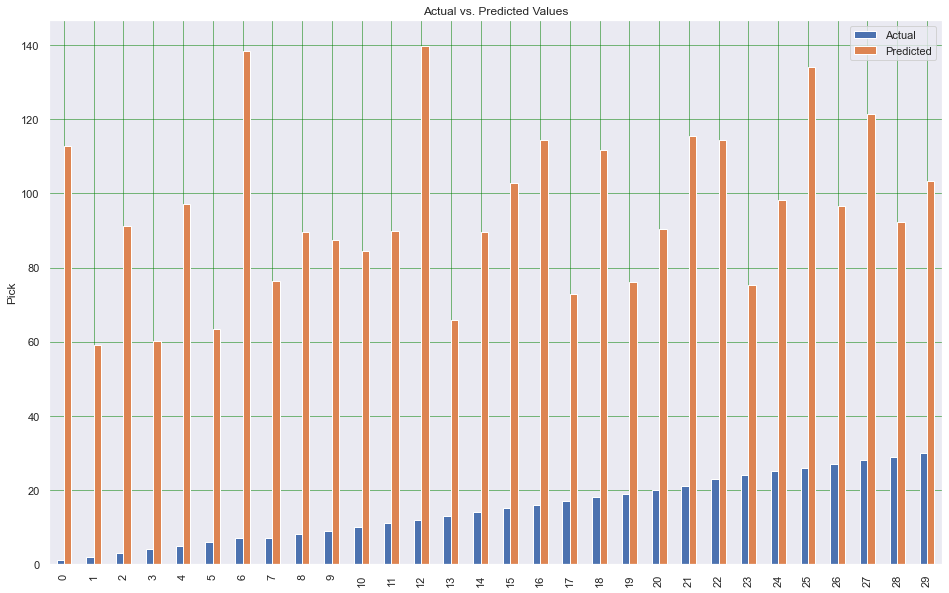

In [386]:
# Create dataframe of predicted vs. actual values
df_pred_gb = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_gb.flatten()})
df_pred_gb.head(30).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs. Predicted Values')
plt.ylabel('Pick')
plt.show()

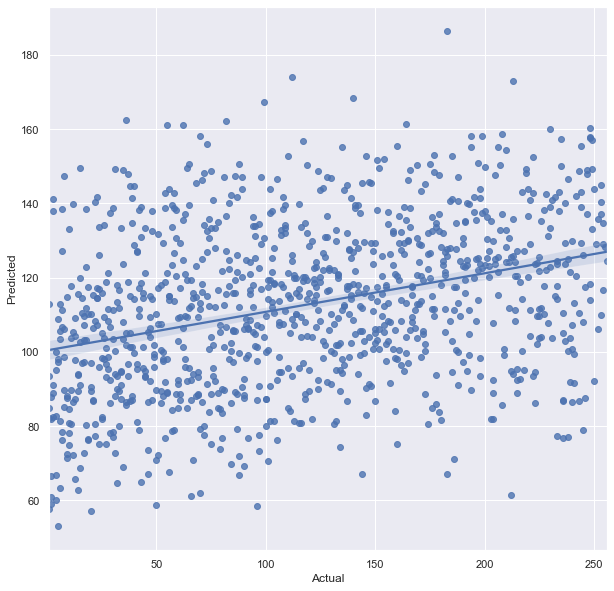

In [387]:
plt.figure(figsize=(10,10))
sns.regplot(x="Actual", y="Predicted", data=df_pred_gb)
#plt.xticks(np.arange(-1, 15, 1.0))
plt.show()

We were able to improve the model slightly but the predictive power is still relatively low. Instead of trying to predict all the positions together, I think we'd have better results if we separate the models by position. Many drills in the Combine are irrelevant to certain positions' overall ability at that position.

# Modeling: Separate by Player Position 

We will now try to predict draft position from Combine results for each position. Since the Gradient Boosting method had the most success in the prevoius section we'll test that model on 4 positions: wide reciever, defesnive back, quarterback, and running back. We'll use a regression model for all positions.


#### Quarterbacks

In [479]:
#define training sets
X_train = df[(df['Draft_Year']<=2010) & (df['Pos_QB']== 1)]
X_train = X_train.drop(Stats,axis=1)
X_train = X_train.drop(['Pick','Rnd','Draft_Year'],axis=1)
y_train = df[(df['Draft_Year']<=2010) & (df['Pos_QB']== 1)]
# Change our target variabel to 'Pick'
y_train = y_train['Pick'].values

#define test sets
X_test = df[(df['Draft_Year']>=2011) & (df['Pos_QB']== 1)]
X_test = X_test.drop(Stats,axis=1)
X_test = X_test.drop(['Pick','Rnd','Draft_Year',],axis=1)
y_test = df[(df['Draft_Year']>=2011) & (df['Pos_QB']== 1)]
y_test = y_test['Pick'].values

In [480]:
print(X_test.shape,X_train.shape,y_test.shape,y_train.shape)

(48, 14) (236, 14) (48,) (236,)


### Scale Data to Prep for Model Creation

In [481]:
#scale data
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Model: Ridge Regression


In [482]:
# Use Gridsearch to determine the best parameters for model optimization.
alpha_space = np.logspace(-4, 10, 100)
parameters = {'alpha':alpha_space}
searcher = GridSearchCV(rreg, parameters,cv=5)
searcher.fit(X_train_scaled, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test_scaled, y_test))

Best CV params {'alpha': 86.97490026177834}
Best CV accuracy 0.08393246701206558
Test accuracy of best grid search hypers: 0.1154458191638088


In [483]:
# Apply best parameters to the model
from sklearn.linear_model import Ridge
rreg = Ridge(alpha=86.97490026177834)
rreg.fit(X_train_scaled,y_train)
y_pred_rreg = rreg.predict(X_test_scaled)
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred_rreg)}")
print(f"Explained Variance: {metrics.explained_variance_score(y_test,y_pred_rreg)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred_rreg)}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test,y_pred_rreg))}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred_rreg)}")
r2 = metrics.r2_score(y_test,y_pred_rreg)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print(f"Adjusted R2 Score: {adj_r2}")

Mean Squared Error: 5429.74331408137
Explained Variance: 0.1194309932716271
Mean Absolute Error: 63.15973611112373
Root Mean Squared Error: 73.68679199206171
R2 Score: 0.1154458191638088
Adjusted R2 Score: 0.059410712685498024


#### Review model coefficeints to determine most important features

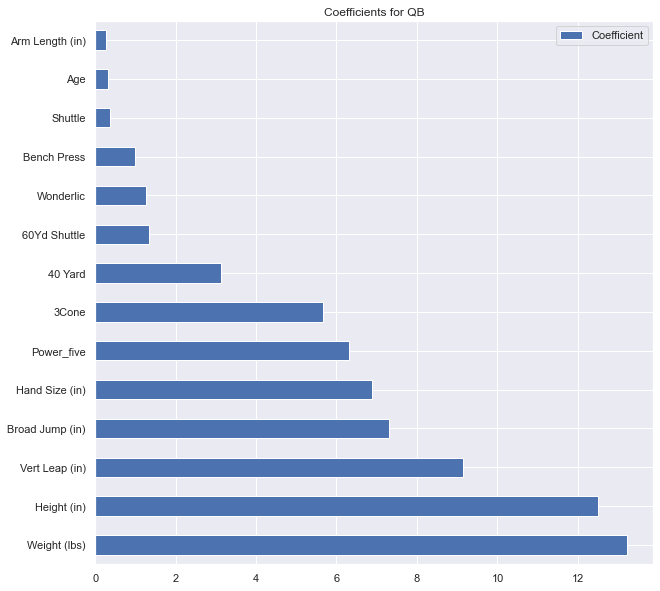

In [484]:
co_df = pd.DataFrame(abs(rreg.coef_), X_train.columns, columns=['Coefficient'])
co_df.sort_values(by=['Coefficient'], ascending=False,inplace=True)
co_df.head(25).plot(kind='barh',figsize=(10,10))
plt.title('Coefficients for QB')
plt.show()

#### Visualize Model Performance

In [509]:
# Create dataframe of predicted vs. actual values
df_pred_rreg = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_rreg.flatten()})

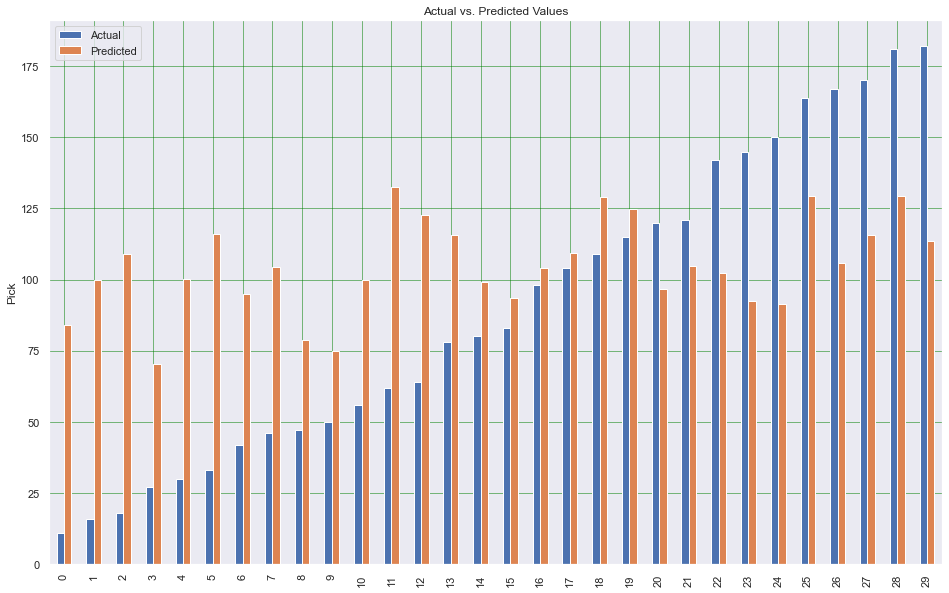

In [510]:
df_pred_rreg.head(30).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs. Predicted Values')
plt.ylabel('Pick')
plt.show()

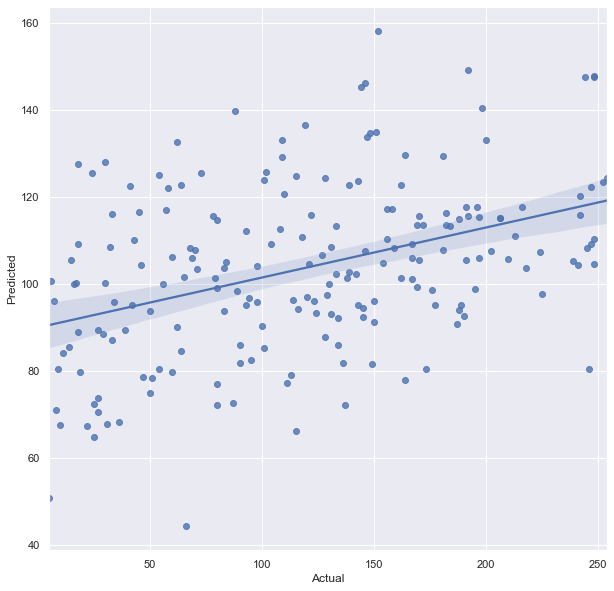

In [511]:
plt.figure(figsize=(10,10))
sns.regplot(x="Actual", y="Predicted", data=df_pred_rreg)
#plt.xticks(np.arange(-1, 15, 1.0))
plt.show()

There is almost no predictive power in determining draft position for quarterbacks. It is a little surprising to see doing well on the Combine rarely has any effect in increasing
one's chance of being drafted. After all, what is being measured in the Combine is one's pure
athleticism which should never be a bad thing to have for an athlete. This might be due to the
fact that many of the top college quarterbacks already know they are being drafted and have no
exciting reason to perform well. Also, there are position specific drills for every position, and
most of the qualities NFL quarterbacks ought to carry are best demonstrated by those drills
that can actually test one's ability to throw the ball.

#### Wide Receivers

In [512]:
#define training sets
X_train = df[(df['Draft_Year']<=2010) & (df['Pos_WR']== 1)]
X_train = X_train.drop(Stats,axis=1)
X_train = X_train.drop(['Pick','Rnd','Draft_Year'],axis=1)
y_train = df[(df['Draft_Year']<=2010) & (df['Pos_WR']== 1)]
# Change our target variabel to 'Pick'
y_train = y_train['Pick'].values

#define test sets
X_test = df[(df['Draft_Year']>=2011) & (df['Pos_WR']== 1)]
X_test = X_test.drop(Stats,axis=1)
X_test = X_test.drop(['Pick','Rnd','Draft_Year',],axis=1)
y_test = df[(df['Draft_Year']>=2011) & (df['Pos_WR']== 1)]
y_test = y_test['Pick'].values

### Scale Data to Prep for Model Creation

In [513]:
#scale data
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Model: Ridge Regression


In [514]:
# Use Gridsearch to determine the best parameters for model optimization.
alpha_space = np.logspace(-4, 10, 100)
parameters = {'alpha':alpha_space}
searcher = GridSearchCV(rreg, parameters,cv=5)
searcher.fit(X_train_scaled, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test_scaled, y_test))

Best CV params {'alpha': 319.92671377973846}
Best CV accuracy 0.037025069698495394
Test accuracy of best grid search hypers: 0.1124386815995212


In [515]:
# Apply best parameters to the model
rreg = Ridge(alpha=319.92671377973846)
rreg.fit(X_train_scaled,y_train)
y_pred_rreg = rreg.predict(X_test_scaled)
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred_rreg)}")
print(f"Explained Variance: {metrics.explained_variance_score(y_test,y_pred_rreg)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred_rreg)}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test,y_pred_rreg))}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred_rreg)}")
r2 = metrics.r2_score(y_test,y_pred_rreg)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print(f"Adjusted R2 Score: {adj_r2}")

Mean Squared Error: 4438.154144712534
Explained Variance: 0.11293542724891303
Mean Absolute Error: 55.61918074942738
Root Mean Squared Error: 66.61947271415869
R2 Score: 0.1124386815995212
Adjusted R2 Score: 0.09032861316961605


#### Review model coefficeints to determine most important features

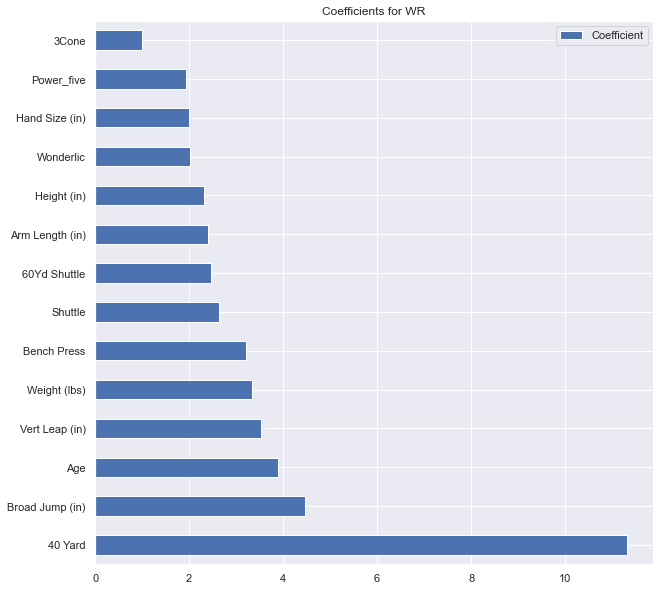

In [492]:
co_df = pd.DataFrame(abs(rreg.coef_), X_train.columns, columns=['Coefficient'])
co_df.sort_values(by=['Coefficient'], ascending=False,inplace=True)
co_df.head(25).plot(kind='barh',figsize=(10,10))
plt.title('Coefficients for WR')
plt.show()

#### Visualize Model Performance

In [516]:
# Create dataframe of predicted vs. actual values
df_pred_rreg = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_rreg.flatten()})


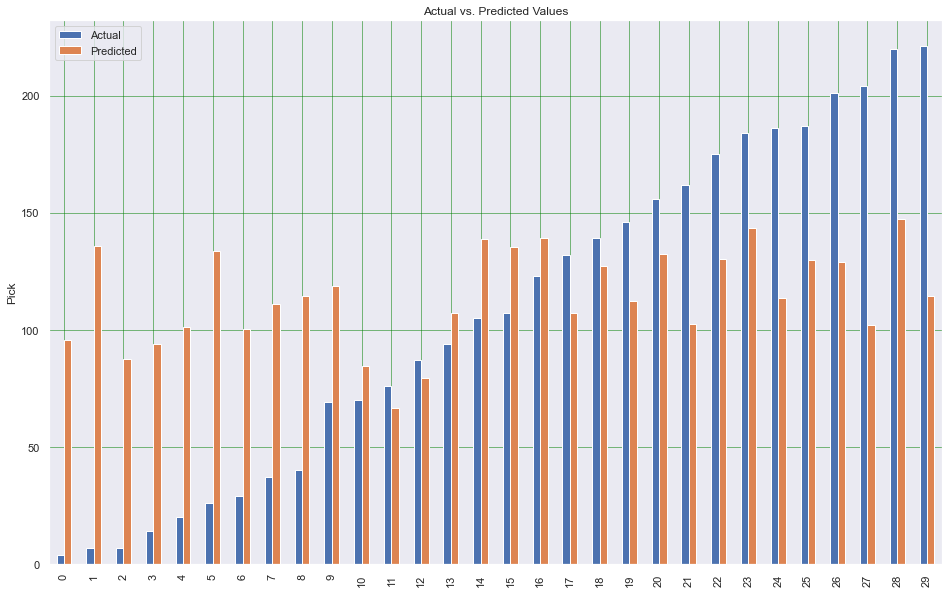

In [517]:
df_pred_rreg.head(30).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs. Predicted Values')
plt.ylabel('Pick')
plt.show()

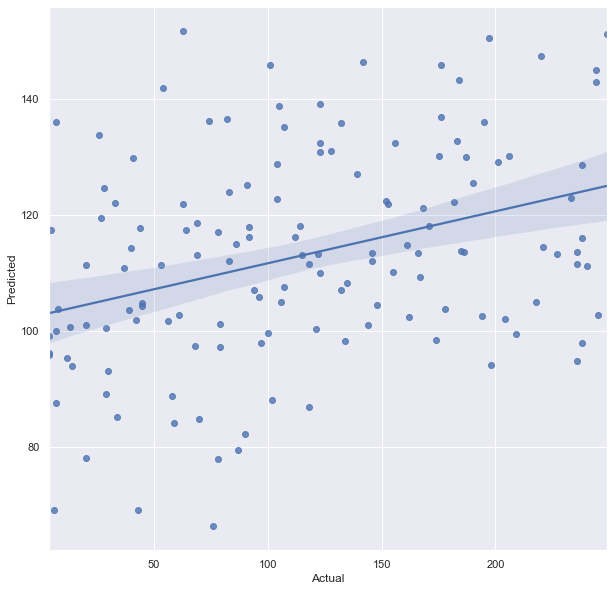

In [518]:
plt.figure(figsize=(10,10))
sns.regplot(x="Actual", y="Predicted", data=df_pred_rreg)
#plt.xticks(np.arange(-1, 15, 1.0))
plt.show()

The adjusted R2 is a little too low to convey
any significance. However, it is almost impossible to ignore
from the model coefficients just how the 40-yard dash variable in this model is behaving; it is strongly
suggestive of something.

#### Defensive Backs

In [526]:
#define training sets
X_train = df[(df['Draft_Year']<=2010) & (df['Pos_DB']== 1)]
X_train = X_train.drop(Stats,axis=1)
X_train = X_train.drop(['Pick','Rnd','Draft_Year'],axis=1)
y_train = df[(df['Draft_Year']<=2010) & (df['Pos_DB']== 1)]
# Change our target variabel to 'Pick'
y_train = y_train['Pick'].values

#define test sets
X_test = df[(df['Draft_Year']>=2011) & (df['Pos_DB']== 1)]
X_test = X_test.drop(Stats,axis=1)
X_test = X_test.drop(['Pick','Rnd','Draft_Year',],axis=1)
y_test = df[(df['Draft_Year']>=2011) & (df['Pos_DB']== 1)]
y_test = y_test['Pick'].values

### Scale Data to Prep for Model Creation

In [527]:
#scale data
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Model: Ridge Regression


In [528]:
# Use Gridsearch to determine the best parameters for model optimization.
alpha_space = np.logspace(-4, 10, 100)
parameters = {'alpha':alpha_space}
searcher = GridSearchCV(rreg, parameters,cv=5)
searcher.fit(X_train_scaled, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test_scaled, y_test))

Best CV params {'alpha': 231.01297000831582}
Best CV accuracy 0.06354497029748726
Test accuracy of best grid search hypers: 0.09141824292496925


In [529]:
# Apply best parameters to the model
rreg = Ridge(alpha=231.01297000831582)
rreg.fit(X_train_scaled,y_train)
y_pred_rreg = rreg.predict(X_test_scaled)
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred_rreg)}")
print(f"Explained Variance: {metrics.explained_variance_score(y_test,y_pred_rreg)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred_rreg)}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test,y_pred_rreg))}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred_rreg)}")
r2 = metrics.r2_score(y_test,y_pred_rreg)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print(f"Adjusted R2 Score: {adj_r2}")

Mean Squared Error: 4255.452400497705
Explained Variance: 0.14761420420344762
Mean Absolute Error: 54.70335827172451
Root Mean Squared Error: 65.23382865122745
R2 Score: 0.09141824292496925
Adjusted R2 Score: 0.07571436070391935


#### Review model coefficeints to determine most important features

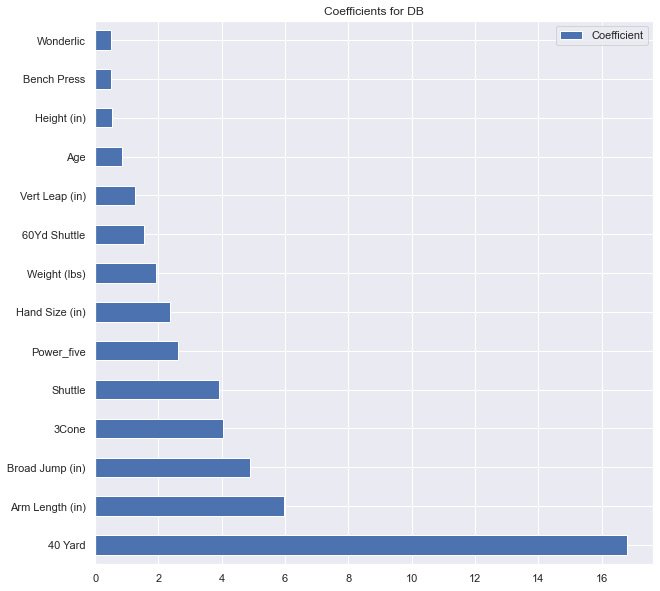

In [530]:
co_df = pd.DataFrame(abs(rreg.coef_), X_train.columns, columns=['Coefficient'])
co_df.sort_values(by=['Coefficient'], ascending=False,inplace=True)
co_df.head(25).plot(kind='barh',figsize=(10,10))
plt.title('Coefficients for DB')
plt.show()

#### Visualize Model Performance

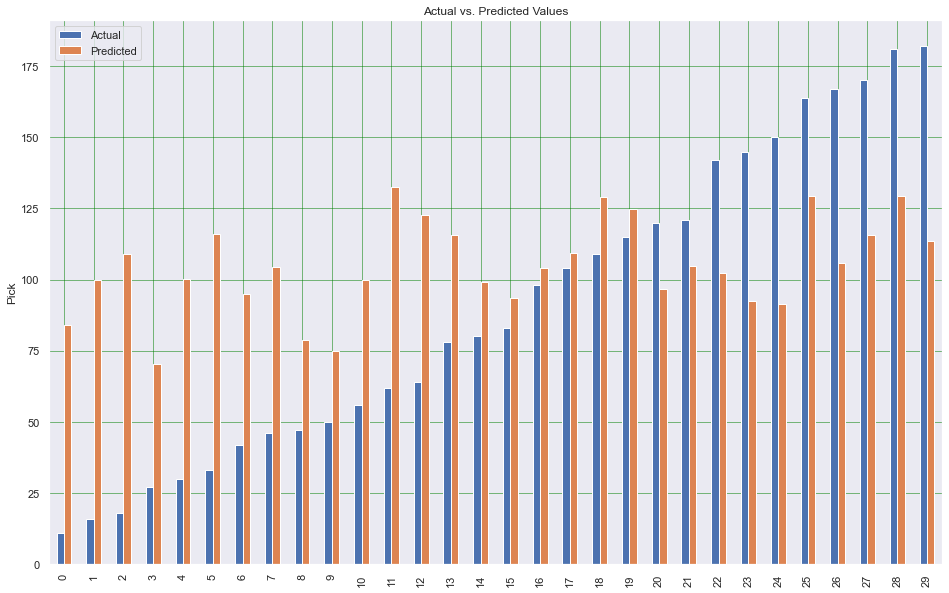

In [531]:
# Create dataframe of predicted vs. actual values
df_pred_rreg = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_rreg.flatten()})
df_pred_rreg.head(30).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs. Predicted Values')
plt.ylabel('Pick')
plt.show()

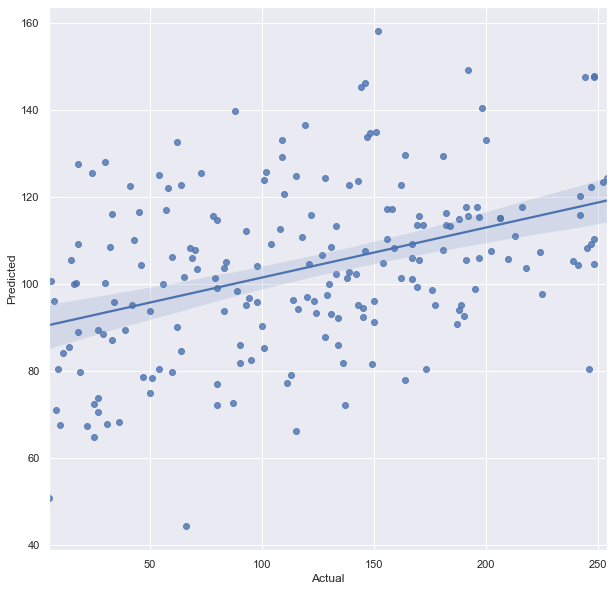

In [532]:
plt.figure(figsize=(10,10))
sns.regplot(x="Actual", y="Predicted", data=df_pred_rreg)
#plt.xticks(np.arange(-1, 15, 1.0))
plt.show()

#### Runningbacks


In [533]:
#define training sets
X_train = df[(df['Draft_Year']<=2010) & (df['Pos_RB']== 1)]
X_train = X_train.drop(Stats,axis=1)
X_train = X_train.drop(['Pick','Rnd','Draft_Year'],axis=1)
y_train = df[(df['Draft_Year']<=2010) & (df['Pos_RB']== 1)]
# Change our target variabel to 'Pick'
y_train = y_train['Pick'].values

#define test sets
X_test = df[(df['Draft_Year']>=2011) & (df['Pos_RB']== 1)]
X_test = X_test.drop(Stats,axis=1)
X_test = X_test.drop(['Pick','Rnd','Draft_Year',],axis=1)
y_test = df[(df['Draft_Year']>=2011) & (df['Pos_RB']== 1)]
y_test = y_test['Pick'].values

### Scale Data to Prep for Model Creation

In [534]:
#scale data
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Model: Ridge Regression


In [535]:
# Use Gridsearch to determine the best parameters for model optimization.
alpha_space = np.logspace(-4, 10, 100)
parameters = {'alpha':alpha_space}
searcher = GridSearchCV(rreg, parameters,cv=5)
searcher.fit(X_train_scaled, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test_scaled, y_test))

Best CV params {'alpha': 120.45035402587811}
Best CV accuracy 0.03495925128864066
Test accuracy of best grid search hypers: 0.12527286339132293


In [536]:
# Apply best parameters to the model
rreg = Ridge(alpha=120.45035402587811)
rreg.fit(X_train_scaled,y_train)
y_pred_rreg = rreg.predict(X_test_scaled)
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred_rreg)}")
print(f"Explained Variance: {metrics.explained_variance_score(y_test,y_pred_rreg)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred_rreg)}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test,y_pred_rreg))}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred_rreg)}")
r2 = metrics.r2_score(y_test,y_pred_rreg)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print(f"Adjusted R2 Score: {adj_r2}")

Mean Squared Error: 3455.555245299645
Explained Variance: 0.17004863392120662
Mean Absolute Error: 49.01319685142528
Root Mean Squared Error: 58.783970989544805
R2 Score: 0.12527286339132293
Adjusted R2 Score: 0.09712072566138852


#### Review model coefficeints to determine most important features

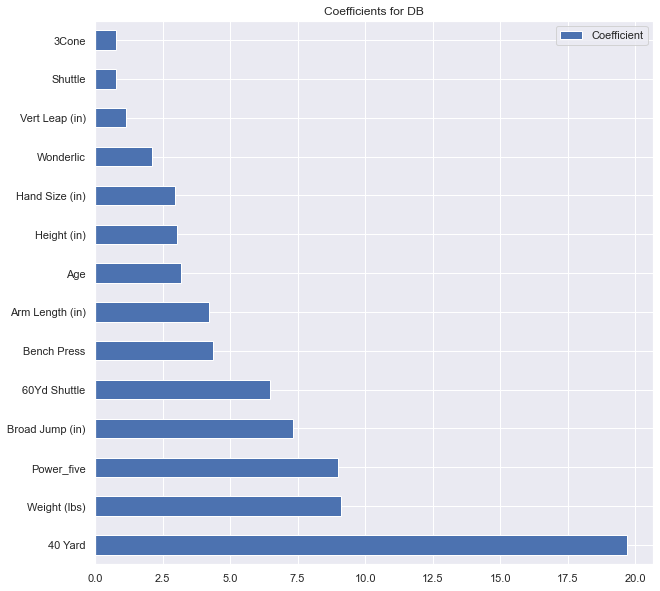

In [537]:
co_df = pd.DataFrame(abs(rreg.coef_), X_train.columns, columns=['Coefficient'])
co_df.sort_values(by=['Coefficient'], ascending=False,inplace=True)
co_df.head(25).plot(kind='barh',figsize=(10,10))
plt.title('Coefficients for DB')
plt.show()

#### Visualize Model Performance

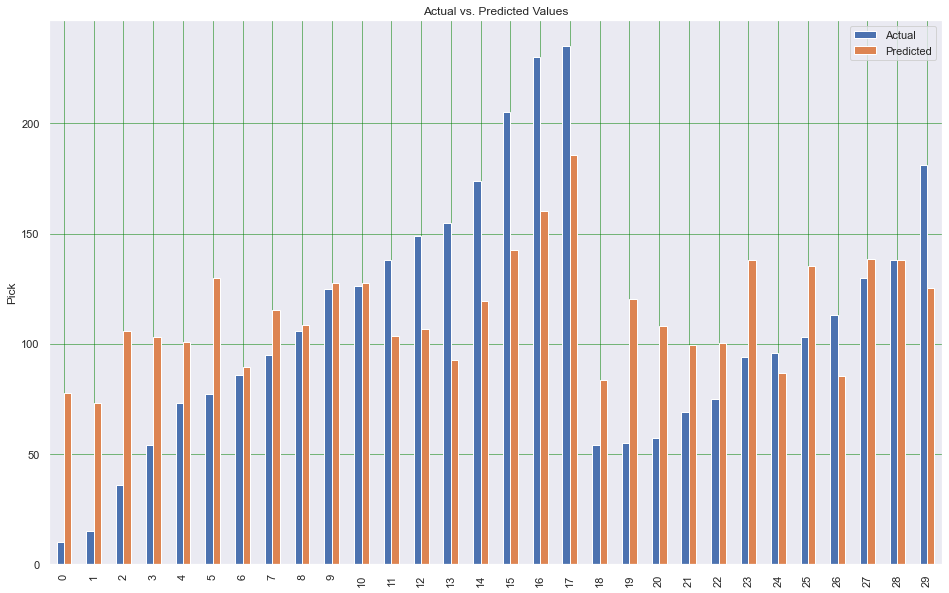

In [538]:
# Create dataframe of predicted vs. actual values
df_pred_rreg = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_rreg.flatten()})
df_pred_rreg.head(30).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs. Predicted Values')
plt.ylabel('Pick')
plt.show()

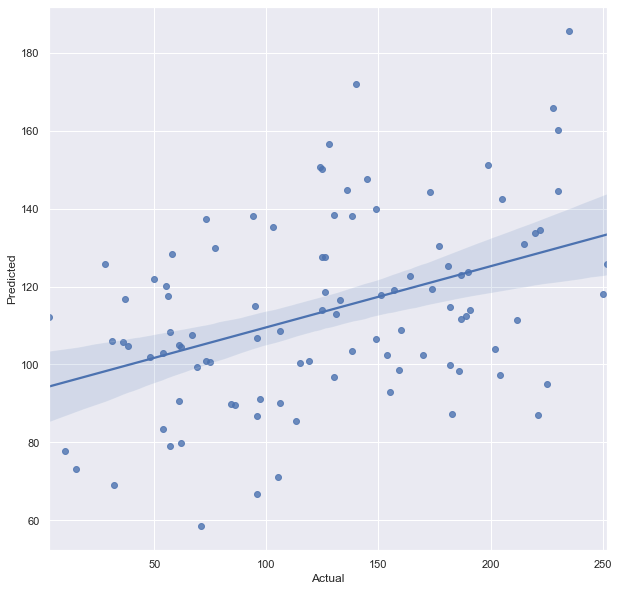

In [539]:
plt.figure(figsize=(10,10))
sns.regplot(x="Actual", y="Predicted", data=df_pred_rreg)
#plt.xticks(np.arange(-1, 15, 1.0))
plt.show()

### Conclusions

Overall, separating players by positions didn't improve the models predictive power by all that much. However we concluded that quarterbacks performance in the Combine matters little towards Draft position, whereas the 40 yard dash is an important indicator of draft position among skill players. Power five seems to be an important feature among running backs suggesting power five running backs are picked higher in the draft.